# Проект: Обучение с учителем: качество модели

**Описание проекта**

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.
«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе. 
Итак, вашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

Нужно промаркировать уровень финансовой активности постоянных покупателей. 
В компании принято выделять два уровня активности: 
- «снизилась», если клиент стал покупать меньше товаров, 
- «прежний уровень».

Нужно собрать данные по клиентам по следующим группам:
- Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
- Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
- Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
- Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.

- Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца. 
- В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.
- Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.

**Описание данных**


Данные для работы находятся в нескольких таблицах.  
<u>market_file.csv</u>- *Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении:*
- id — номер покупателя в корпоративной базе данных.
- Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- Тип сервиса — уровень сервиса, например «премиум» и «стандарт». Зависит от наличия определенной подписки у пользователя.
- Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
- Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
- Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
- Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта за последние 3 месяца.
- Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

<u>market_money.csv </u>- *Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом:*
- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- Выручка — сумма выручки за период в условных единицах.

<u> market_time.csv </u>-*Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
- id — номер покупателя в корпоративной базе данных:*
- Период — название периода, во время которого зафиксировано общее время.
- минут — значение времени, проведённого на сайте, в минутах.

<u>money.csv </u>- *Таблица с данными о среднемесячной прибыли продавца за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю:*
- id — номер покупателя в корпоративной базе данных.
- Прибыль — значение прибыли в условных единицах.

## Шаг. Загрузка данных

In [1]:
!pip install --upgrade -q scikit-learn
!pip install --upgrade -q shap
!pip install -q matplotlib==3.5.1
!pip install -q shap

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from  statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats as st
from scipy.stats import spearmanr
import numpy as np
import seaborn as sns
!pip install phik
import phik
from scipy import stats as st
from scipy.stats import norm
from statsmodels.tools.tools import add_constant
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import time

# загружаем класс pipeline
from sklearn.pipeline import Pipeline

# загружаем классы для подготовки данных
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer

# загружаем класс для работы с пропусками
from sklearn.impute import SimpleImputer

# загружаем функцию для работы с метриками
from sklearn.metrics import roc_auc_score

# импортируем класс RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# загружаем нужные модели
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import shap

RANDOM_STATE = 42
TEST_SIZE = 0.25


In [3]:
try:
    market_file = pd.read_csv('/datasets/market_file.csv')
except:
    market_file = pd.read_csv('https://code.s3.yandex.net/datasets/market_file.csv') #загрузили файл market_money.csv 

In [4]:
try:
    market_money = pd.read_csv('/datasets/market_money.csv')
except:
    market_money = pd.read_csv('https://code.s3.yandex.net/datasets/market_money.csv') #загрузили файл market_money.csv

In [5]:
try:
    market_time = pd.read_csv('/datasets/market_time.csv')
except:
    market_time = pd.read_csv('https://code.s3.yandex.net/datasets/market_time.csv') #загрузили файл market_time.csv

In [6]:
try:
    money = pd.read_csv('/datasets/money.csv', sep=';',decimal=',')
except:
    money = pd.read_csv('https://code.s3.yandex.net/datasets/money.csv', sep=';',decimal=',') #загрузили файл money.csv

In [7]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100))
        return f'{pct:.1f}%\n({val})'
    return my_autopct

In [8]:
def data_description(data): #функция, которая выводит основную информацию о датасете
    name = [name for name, df in globals().items() if df is data][0]
    print("Анализ данных для датафрейма",name)
    print()
    # Вывод информации о данных
    print("Информация о данных:")
    display(data.shape)
    display(data.info())
    print("\n" + "-"*50 + "\n")
    
    # Вывод описания данных
    print("Описание данных:")
    display(data.describe())
    print("\n" + "-"*50 + "\n")
    
    # Вывод первых строк данных
    print("Первые строки данных:")
    display(data.head())
    print("\n" + "-"*50 + "\n")
    
    # Вывод количества пропущенных значений по каждому столбцу
    print("Количество пропущенных значений:")
    display(data.isna().sum())
      # Вывод количества дубликатов
    print("Количество дубликатов:")
    display(data.duplicated().sum())
    print("\n" + "-"*50 + "\n")


In [9]:
def freedman_diaconis_rule (data):
    data =np.array(data)
    q75,q25= np.percentile (data,[75, 25])
    iqr =q75- q25
    bin_width = 2*iqr /(len(data)**(1/3))
    if bin_width == 0:
        return 1
    return int (np.ceil(data.max()-data.min())/bin_width)

In [10]:
def rice_rule (data):
    n=len(data)
    return int(np.ceil(2*n**(1/3)))

In [11]:
def graf_analysis_rice (df): #функция,которая строит графики распределния по всем столбцам датасета
    categorial_columns= df.select_dtypes(exclude='number').columns.tolist()
    numeral_list =  df.select_dtypes(include='number').columns.tolist()
    for col in numeral_list:
        bins =  plt.hist(df[col], bins= rice_rule(df[col]))
        plt.suptitle(f'Гистограммы признаков {col}', fontsize=18)
        plt.vlines(x=df[col].mean(), colors='red', ymin=bins[0].min(), ymax=bins[0].max(), label='Среднее')
        plt.vlines(x=df[col].median(), colors='red', ymin=bins[0].min(), ymax=bins[0].max(), linestyles='--', label='Медиана')
        plt.legend()
        plt.xlabel('Значения')
        plt.ylabel("Частота")
        plt.show() 
    for col in numeral_list:
        plt.figure()
        plt.title(f'Boxplot для столбца {col}')
        df.boxplot(column=col , figsize=(15, 17) , grid=True,vert=False)
        plt.show()
    palette = sns.color_palette('coolwarm')
    for col in categorial_columns:
        df[col].value_counts().plot.pie(colors=palette, title=f'Круговая диаграмма для столбца {col}',autopct=make_autopct(df[col].value_counts()), startangle=90)
        plt.ylabel("")
        plt.show()     
    list_without_grafic=[]
    for column in df.columns:
             if column not in numeral_list+ categorial_columns:
                 list_without_grafic.append(column)
    if not list_without_grafic:
        message = "Графики построены по всем столбцам"
    else:
        message =f'не построены графики для столбца {list_without_grafic}'
    return print(message)

In [12]:
def graf_analysis (df): #функция,которая строит графики распределния по всем столбцам датасета
    categorial_columns= df.select_dtypes(exclude='number').columns.tolist()
    numeral_list =  df.select_dtypes(include='number').columns.tolist()
    for col in numeral_list:
        bins =  plt.hist(df[col], bins= freedman_diaconis_rule(df[col]))
        plt.suptitle(f'Гистограммы признаков {col}', fontsize=18)
        plt.vlines(x=df[col].mean(), colors='red', ymin=bins[0].min(), ymax=bins[0].max(), label='Среднее')
        plt.vlines(x=df[col].median(), colors='red', ymin=bins[0].min(), ymax=bins[0].max(), linestyles='--', label='Медиана')
        plt.legend()
        plt.xlabel('Значения')
        plt.ylabel("Частота")
        plt.show() 
    for col in numeral_list:
        plt.figure()
        plt.title(f'Boxplot для столбца {col}')
        df.boxplot(column=col , figsize=(15, 17) , grid=True,vert=False)
        plt.show()
    palette = sns.color_palette('coolwarm')
    for col in categorial_columns:
        df[col].value_counts().plot.pie(colors=palette, title=f'Круговая диаграмма для столбца {col}',autopct=make_autopct(df[col].value_counts()), startangle=90)
        plt.ylabel("")
        plt.show()     
    list_without_grafic=[]
    for column in df.columns:
             if column not in numeral_list+ categorial_columns:
                 list_without_grafic.append(column)
    if not list_without_grafic:
        message = "Графики построены по всем столбцам"
    else:
        message =f'не построены графики для столбца {list_without_grafic}'
    return print(message)

In [13]:
def graf_analysis_without_bins (df): #функция,которая строит графики распределния по всем столбцам датасета
    categorial_columns= df.select_dtypes(exclude='number').columns.tolist()
    numeral_list =  df.select_dtypes(include='number').columns.tolist()
    for col in numeral_list:
        bins =  plt.hist(df[col])
        plt.suptitle(f'Гистограммы признаков {col}', fontsize=18)
        plt.vlines(x=df[col].mean(), colors='red', ymin=bins[0].min(), ymax=bins[0].max(), label='Среднее')
        plt.vlines(x=df[col].median(), colors='red', ymin=bins[0].min(), ymax=bins[0].max(), linestyles='--', label='Медиана')
        plt.legend()
        plt.xlabel('Значения')
        plt.ylabel("Частота")
        plt.show() 
    for col in numeral_list:
        plt.figure()
        plt.title(f'Boxplot для столбца {col}')
        df.boxplot(column=col , figsize=(15, 17) , grid=True,vert=False)
        plt.show()
    palette = sns.color_palette('coolwarm')
    for col in categorial_columns:
        df[col].value_counts().plot.pie(colors=palette, title=f'Круговая диаграмма для столбца {col}',autopct=make_autopct(df[col].value_counts()), startangle=90)
        plt.ylabel("")
        plt.show()     
    list_without_grafic=[]
    for column in df.columns:
             if column not in numeral_list+ categorial_columns:
                 list_without_grafic.append(column)
    if not list_without_grafic:
        message = "Графики построены по всем столбцам"
    else:
        message =f'не построены графики для столбца {list_without_grafic}'
    return print(message)

In [14]:
data_description(market_file)

Анализ данных для датафрейма market_file

Информация о данных:


(1300, 13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

None


--------------------------------------------------

Описание данных:


id  Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  \
count    1300.000000         1300.000000           1300.000000   1300.000000   
mean   215997.500000            4.253769              4.011538    601.898462   
std       375.421985            1.014814              0.696868    249.856289   
min    215348.000000            0.900000              3.000000    110.000000   
25%    215672.750000            3.700000              4.000000    405.500000   
50%    215997.500000            4.200000              4.000000    606.000000   
75%    216322.250000            4.900000              4.000000    806.000000   
max    216647.000000            6.600000              5.000000   1079.000000   

       Акционные_покупки  Средний_просмотр_категорий_за_визит  \
count        1300.000000                           1300.00000   
mean            0.319808                              3.27000   
std             0.249843                              1.35535   
min             0.000000                              1.00000   
25%             0.170000                              2.00000   
50%             0.240000                              3.00000   
75%             0.300000                              4.00000   
max             0.990000                              6.00000   

       Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
count                         1300.000000     1300.000000       1300.000000  
mean                             2.840000        4.185385          8.176923  
std                              1.971451        1.955298          3.978126  
min                              0.000000        0.000000          1.000000  
25%                              1.000000        3.000000          5.000000  
50%                              3.000000        4.000000          8.000000  
75%                              4.000000        6.000000         11.000000  
max                             10.000000        9.000000         20.000000


--------------------------------------------------

Первые строки данных:


id Покупательская активность Тип сервиса Разрешить сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась   стандартт                нет   
3  215351                 Снизилась   стандартт                 да   
4  215352                 Снизилась   стандартт                нет   

   Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   

  Популярная_категория  Средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    6   
1     Товары для детей                                    4   
2    Домашний текстиль                                    5   
3     Товары для детей                                    5   
4     Товары для детей                                    3   

   Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2


--------------------------------------------------

Количество пропущенных значений:


id                                     0
Покупательская активность              0
Тип сервиса                            0
Разрешить сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Популярная_категория                   0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
dtype: int64

Количество дубликатов:


0


--------------------------------------------------



In [15]:
data_description(market_money)

Анализ данных для датафрейма market_money

Информация о данных:


(3900, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


None


--------------------------------------------------

Описание данных:


id        Выручка
count    3900.000000    3900.000000
mean   215997.500000    5025.696051
std       375.325686    1777.704104
min    215348.000000       0.000000
25%    215672.750000    4590.150000
50%    215997.500000    4957.500000
75%    216322.250000    5363.000000
max    216647.000000  106862.200000


--------------------------------------------------

Первые строки данных:


id               Период  Выручка
0  215348  препредыдущий_месяц      0.0
1  215348        текущий_месяц   3293.1
2  215348     предыдущий_месяц      0.0
3  215349  препредыдущий_месяц   4472.0
4  215349        текущий_месяц   4971.6


--------------------------------------------------

Количество пропущенных значений:


id         0
Период     0
Выручка    0
dtype: int64

Количество дубликатов:


0


--------------------------------------------------



In [16]:
data_description(market_time)

Анализ данных для датафрейма market_time

Информация о данных:


(2600, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


None


--------------------------------------------------

Описание данных:


id        минут
count    2600.000000  2600.000000
mean   215997.500000    13.336154
std       375.349754     4.080198
min    215348.000000     4.000000
25%    215672.750000    10.000000
50%    215997.500000    13.000000
75%    216322.250000    16.000000
max    216647.000000    23.000000


--------------------------------------------------

Первые строки данных:


id            Период  минут
0  215348     текущий_месяц     14
1  215348  предыдцщий_месяц     13
2  215349     текущий_месяц     10
3  215349  предыдцщий_месяц     12
4  215350     текущий_месяц     13


--------------------------------------------------

Количество пропущенных значений:


id        0
Период    0
минут     0
dtype: int64

Количество дубликатов:


0


--------------------------------------------------



In [17]:
data_description(money)

Анализ данных для датафрейма money

Информация о данных:


(1300, 2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


None


--------------------------------------------------

Описание данных:


id      Прибыль
count    1300.000000  1300.000000
mean   215997.500000     3.996631
std       375.421985     1.013722
min    215348.000000     0.860000
25%    215672.750000     3.300000
50%    215997.500000     4.045000
75%    216322.250000     4.670000
max    216647.000000     7.430000


--------------------------------------------------

Первые строки данных:


id  Прибыль
0  215348     0.98
1  215349     4.16
2  215350     3.13
3  215351     4.87
4  215352     4.21


--------------------------------------------------

Количество пропущенных значений:


id         0
Прибыль    0
dtype: int64

Количество дубликатов:


0


--------------------------------------------------



**Вывод**:

Типы данных корректные, дубликаты и пропущенные значения в датасетах отсутствуют 

## Шаг. Предобработка данных


Как мы выяснили на шаге загрузки данных  явных дубликатов и пропусков в датасетах нет. Проверим данные на наличие неявных дубликатов.

In [18]:
dataframes = {
    'market_file': market_file,
    'market_money': market_money,
    'market_time': market_time,
    'money': money
}

for name, df in dataframes.items():
    cat_col_names = df.select_dtypes(exclude='number').columns.tolist()
    print(f"Уникальные значения в категориальных колонках DataFrame '{name}':")
    for cat in cat_col_names:
        unique_values = df[cat].unique()
        print(f"Колонка '{cat}': {list(unique_values)}")
    print("\n" + "-"*50 + "\n")

Уникальные значения в категориальных колонках DataFrame 'market_file':
Колонка 'Покупательская активность': ['Снизилась', 'Прежний уровень']
Колонка 'Тип сервиса': ['премиум', 'стандартт', 'стандарт']
Колонка 'Разрешить сообщать': ['да', 'нет']
Колонка 'Популярная_категория': ['Товары для детей', 'Домашний текстиль', 'Косметика и аксесуары', 'Техника для красоты и здоровья', 'Кухонная посуда', 'Мелкая бытовая техника и электроника']

--------------------------------------------------

Уникальные значения в категориальных колонках DataFrame 'market_money':
Колонка 'Период': ['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц']

--------------------------------------------------

Уникальные значения в категориальных колонках DataFrame 'market_time':
Колонка 'Период': ['текущий_месяц', 'предыдцщий_месяц']

--------------------------------------------------

Уникальные значения в категориальных колонках DataFrame 'money':

--------------------------------------------------



Как мы видим, 
- Колонка 'Тип сервиса' в файле 'market_file' содержит опечатку 'стандартт'
- Колонка 'Период'  в файле 'market_time' содержит опечатку 'предыдцщий_месяц'

In [19]:
# Заменим ошибочные значения в датасете market_file
market_file['Тип сервиса'] = market_file['Тип сервиса'].replace('стандартт', 'стандарт')

In [20]:
# Заменим ошибочные значения в датасете m_file
market_time['Период'] = market_time['Период'].replace('предыдцщий_месяц', 'предыдущий_месяц')

In [21]:
market_money.describe()

id        Выручка
count    3900.000000    3900.000000
mean   215997.500000    5025.696051
std       375.325686    1777.704104
min    215348.000000       0.000000
25%    215672.750000    4590.150000
50%    215997.500000    4957.500000
75%    216322.250000    5363.000000
max    216647.000000  106862.200000

In [22]:
money.describe()

id      Прибыль
count    1300.000000  1300.000000
mean   215997.500000     3.996631
std       375.421985     1.013722
min    215348.000000     0.860000
25%    215672.750000     3.300000
50%    215997.500000     4.045000
75%    216322.250000     4.670000
max    216647.000000     7.430000

Как мы видим, данные по выручке и прибыли приведены в разных единицах (руби  тыс.руб)Приведем к единому виду (тыс.руб)

In [23]:
market_money['Выручка'] = market_money['Выручка']/1000

**Вывод:** 

 на этапе предобработки данных были исправлены:    
- опечатки в значениях в столбце 'Период' файла market_time ('предыдцщий_месяц' заменен на 'предыдущий_месяц') и  столбце 'Тип сервиса' файла market_file('стандартт'заменен на  'стандарт)
- Столбец 'выручка' файла market_money был приведен к тыс.руб путем деления знания столбца на 1000

In [24]:
for data in [market_money,money, market_file, market_time]:
    data.columns = data.columns.str.replace(' ', '_').str.lower()
    print (data.columns)

Index(['id', 'период', 'выручка'], dtype='object')
Index(['id', 'прибыль'], dtype='object')
Index(['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит'],
      dtype='object')
Index(['id', 'период', 'минут'], dtype='object')


## Шаг. Исследовательский анализ данных

Проведем исследовательский анализ данных из каждой таблицы. Отберем клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период. Оформим выводы по результатам шага.

Для того, чтобы понять, какие клиенты активны не менее 3 месяцев,тнужно ,чтобы они покупали что-то в текущий месяц, предыдущий месяц и предпредыщущий месяц.Такие данные есть в файле market_money. Создадим список пользователей, которые осуществляли покупки все три последних месяца подряд

In [25]:
filtered_users = market_money.pivot_table(index='id',columns='период', values='выручка',aggfunc=sum )\
.reset_index().query('предыдущий_месяц>0 and препредыдущий_месяц>0 and текущий_месяц>0')['id']

Проверим, сколько пользователей мы исключили

In [26]:
print(len(market_money.pivot_table(index='id',columns='период', values='выручка',aggfunc=sum )\
.reset_index().query('id not in @filtered_users')))

3


In [27]:
print(market_money.pivot_table(index='id',columns='период', values='выручка',aggfunc=sum )\
.reset_index().query('id not in @filtered_users'))

период      id  предыдущий_месяц  препредыдущий_месяц  текущий_месяц
0       215348               0.0                  0.0         3.2931
9       215357               0.0                  0.0         5.9863
11      215359               0.0                  0.0         4.7350


Всего лишь 3 покупателя не осуществили покупку каждый месяц на протяжении трех последних месяцев

Удалим эти данные из всех файлов, так как они будут существенно искажать картину, так как по остальным польозвателям даннные представлены за 3 месяца

In [28]:
market_money = market_money.query('id in @filtered_users')

In [29]:
money = money.query('id in @filtered_users')

In [30]:
market_file = market_file.query('id in @filtered_users')

In [31]:
market_time = market_time.query('id in @filtered_users')

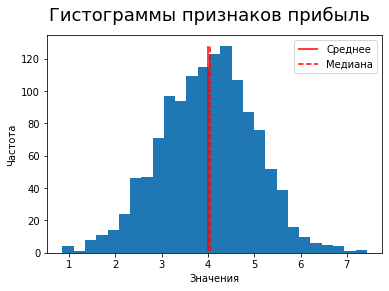

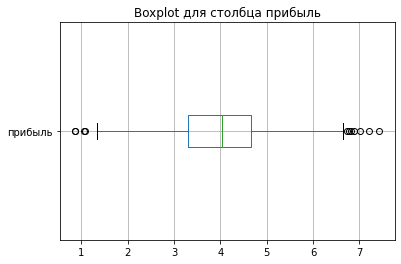

Графики построены по всем столбцам


In [32]:
graf_analysis(money.drop(['id'],axis=1))

Как мы видим, есть прибыль обладает равномерным распределением, среднее значение и медиана примерно совпадают, но есть выбросы, и большая часть выбросов находится в правой части boxplot

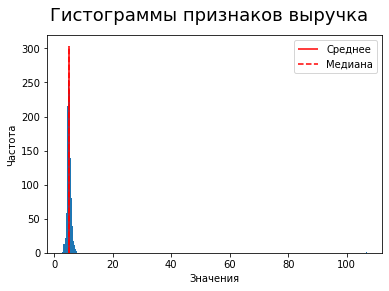

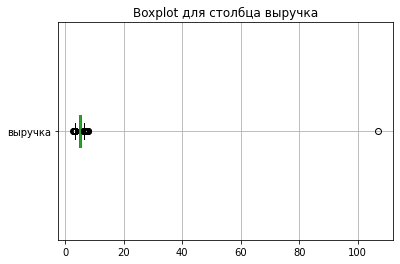

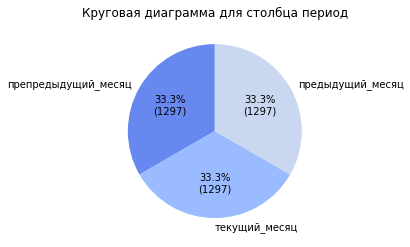

Графики построены по всем столбцам


In [33]:
graf_analysis(market_money.drop('id',axis=1))

Как мы видим, есть один существенный выброс (выручка больше 100), от которого надо избавиться, а также есть выбросы с нулевойй выручкой, которые тоже надо проанализировать

In [34]:
display (market_money.query('выручка > 100 or выручка == 0'))

id         период   выручка
98  215380  текущий_месяц  106.8622

In [35]:
display (market_money.query('id==215380'))

id               период   выручка
96  215380  препредыдущий_месяц    5.0510
97  215380     предыдущий_месяц    6.0770
98  215380        текущий_месяц  106.8622

Удалим данные по этому пользователю из выборки.Явно или ошибка или аномальная закупка.

In [36]:
market_money=market_money.query('id!=215380')

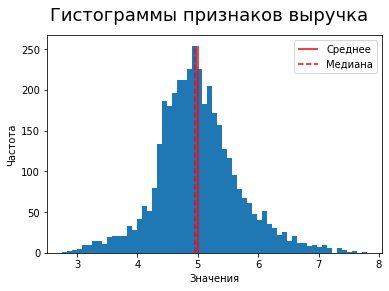

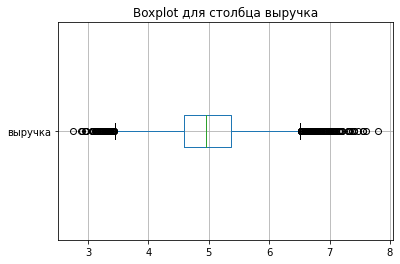

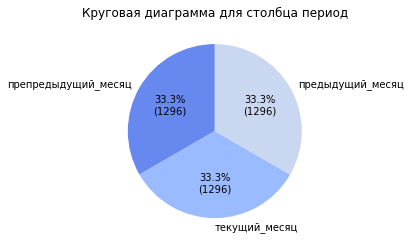

Графики построены по всем столбцам


In [37]:
graf_analysis(market_money.drop('id',axis=1))

Распределение выручки нормальное, среднее совпадает с мединой, также имеются выбросы

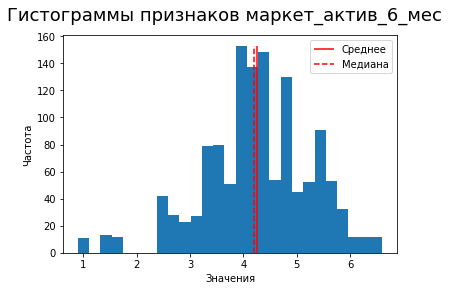

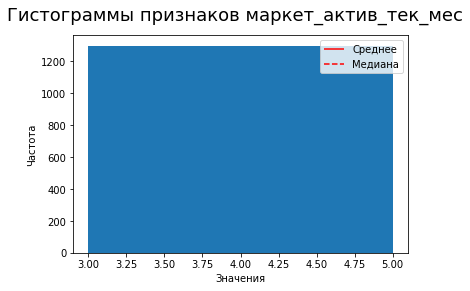

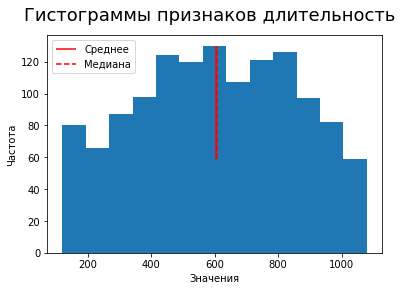

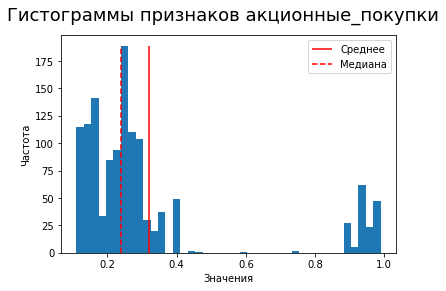

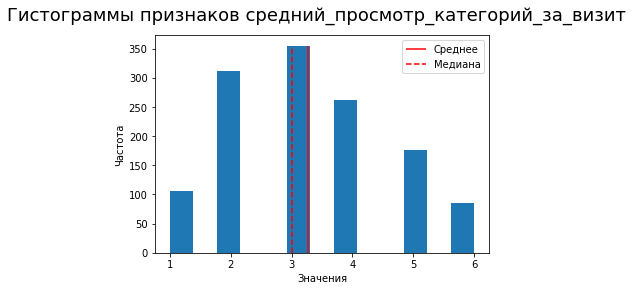

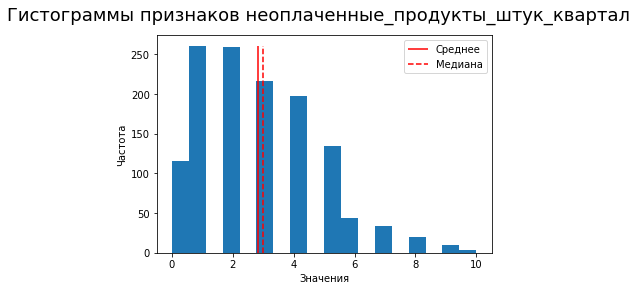

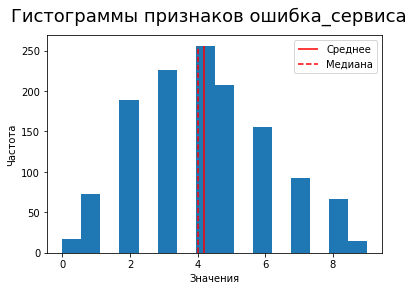

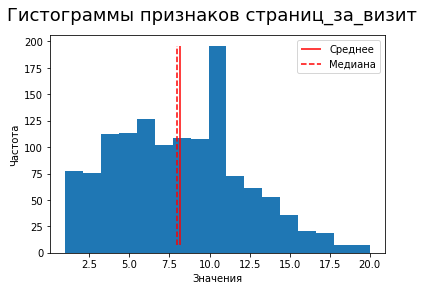

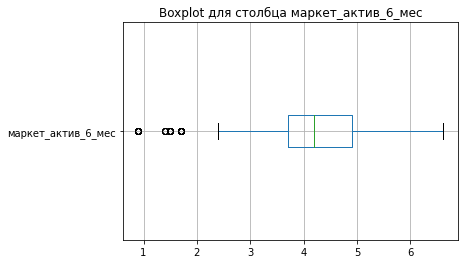

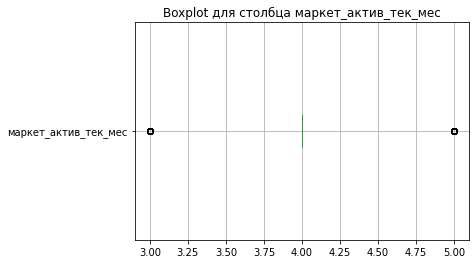

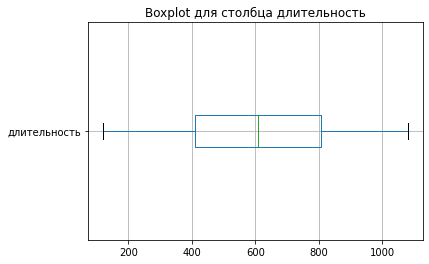

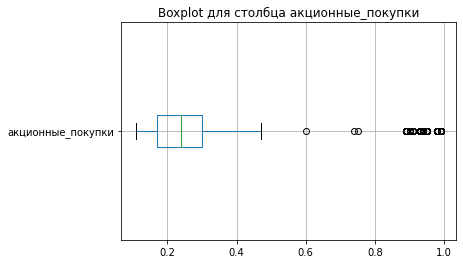

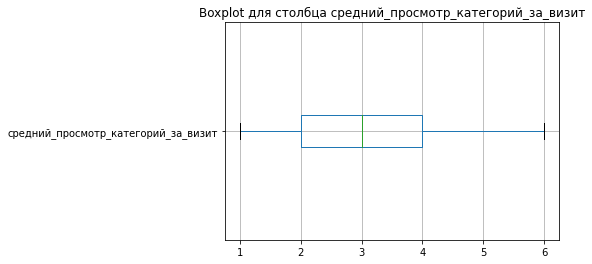

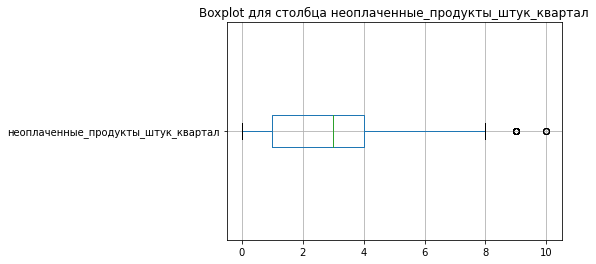

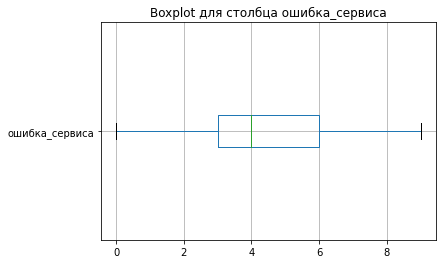

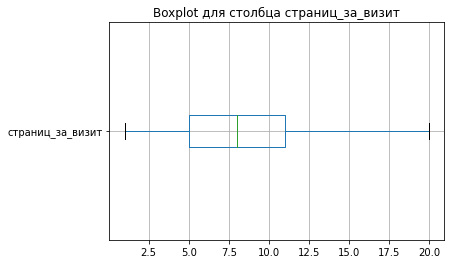

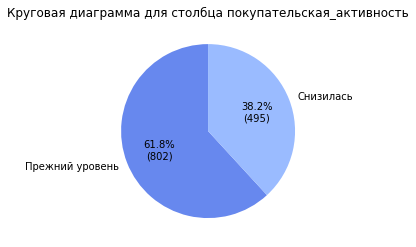

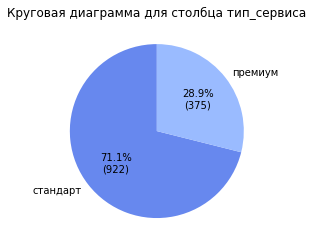

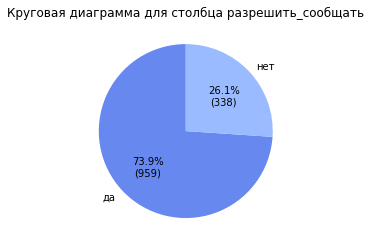

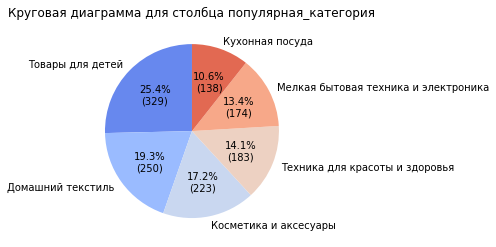

Графики построены по всем столбцам


In [38]:
graf_analysis(market_file.drop(['id'],axis=1))

<div class="alert alert-info"> <b>Построено ниже:</b> Исправлено.... </div> 

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



👍


(всё же предлагаю переходить на seaaborn, будет симпатичнее) 

In [39]:
count_list = ['маркет_актив_тек_мес','средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит']

In [40]:
def countplot_graf(data, column):
    sns.countplot(data=data, x=column)
    plt.title(f'Распределение {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('Количество')
    plt.show()

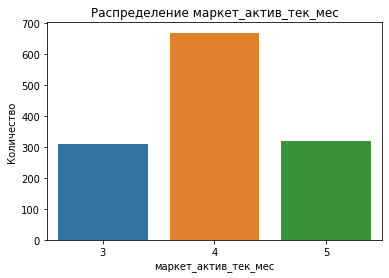

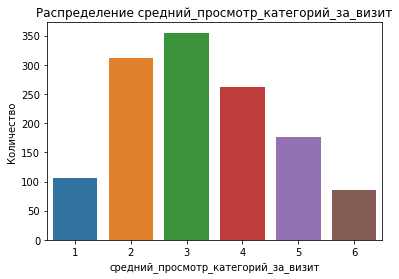

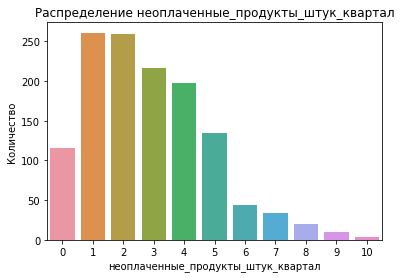

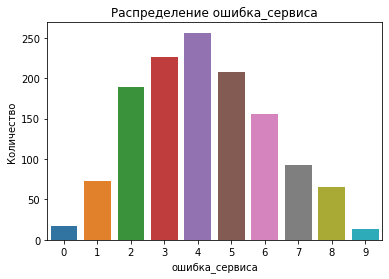

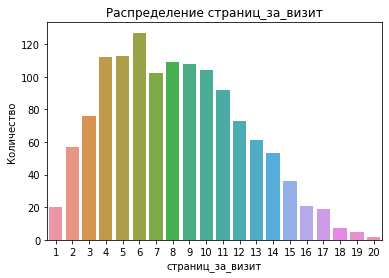

In [41]:
for col in count_list:
    countplot_graf(market_file,col)

Проанализируем количество выбросов

In [42]:
print(len(market_file[market_file['маркет_актив_6_мес']<=2]))

36


Эти данные тоже можем удалить (после объединения таблиц)

In [43]:
print(len(market_file[market_file['неоплаченные_продукты_штук_квартал']>8]))

14


In [44]:
print(len(market_file[market_file['акционные_покупки']>0.5]))

168


Данный выброс слишком значительный для его удаления

Перестроим график 'Маркет_актив_6_мес'вручную

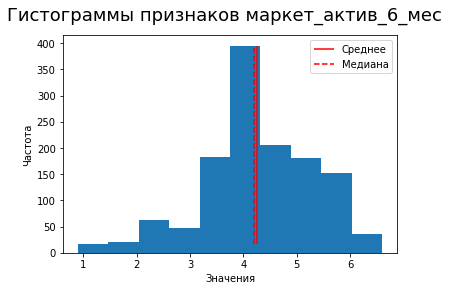

In [45]:
bins =  plt.hist(market_file['маркет_актив_6_мес'])
plt.suptitle(f'Гистограммы признаков маркет_актив_6_мес', fontsize=18)
plt.vlines(x=market_file['маркет_актив_6_мес'].mean(), colors='red', ymin=bins[0].min(), ymax=bins[0].max(), label='Среднее')
plt.vlines(x=market_file['маркет_актив_6_мес'].median(), colors='red', ymin=bins[0].min(), ymax=bins[0].max(), linestyles='--', label='Медиана')
plt.legend()
plt.xlabel('Значения')
plt.ylabel("Частота")
plt.show() 

По категориальным признакам:
- по 'Тип сервиса": 28,9% составляют  премиум' и 71,1% 'стандарт,
- по столбцу 'Разрешить сообщать' 73,9% польозвателей со значением 'да' и 26,1%-со значением 'нет'
- в 'Популярная_категория" 25,4% составляют Товары для детей, 19,3% - Домашний текстиль,17,2%- Косметика и аксесуары, 10,6% - Кухонная посуда, 14,1%-Техника для красоты и здоровья, 13,4% -Мелкая бытовая техника и электроника'

Как вы видим, целевой признак не сбалансиррован: 62%-покупательская активность осталась на прежнем уровне, 38%-снизилась.

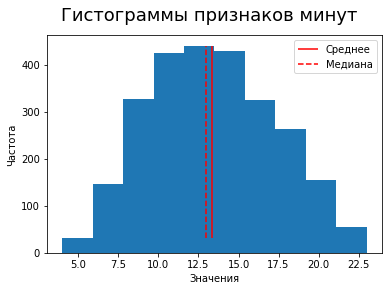

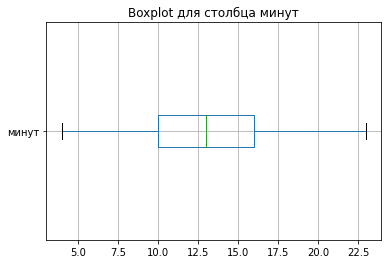

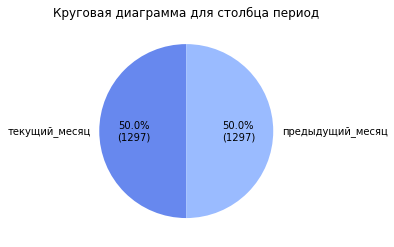

Графики построены по всем столбцам


In [46]:
graf_analysis_without_bins(market_time.drop(['id'],axis=1))

Гистограмма "минут" имеет нормальное распределениесреднее значение и медиана незначительно отличаются друг от друга,медиана составляет 15 минут

In [47]:
def hist_with_hue (df, column, hue_col, bins_count=30):
    plt.figure(figsize=(10,6))
    sns.histplot(df, x= column, bins=bins_count, hue= hue_col, multiple='dodge')
    plt.title(f'Гистограмма признака {column} с разделением на {hue_col}', fontsize=18)
    # Получаем легенду с категориями
    handles, labels = plt.gca().get_legend_handles_labels()
    # Добавляем вертикальные линии, сохраняя объекты
    mean_line = plt.axvline(df[column].mean(), color='red', label='Среднее')
    median_line = plt.axvline(df[column].median(), color='red', linestyle='--', label='Медиана')
    # Добавляем линии в списки легенды
    handles.append(mean_line)
    labels.append('Среднее')
    handles.append(median_line)
    labels.append('Медиана')
    plt.grid(True)
    plt.show()

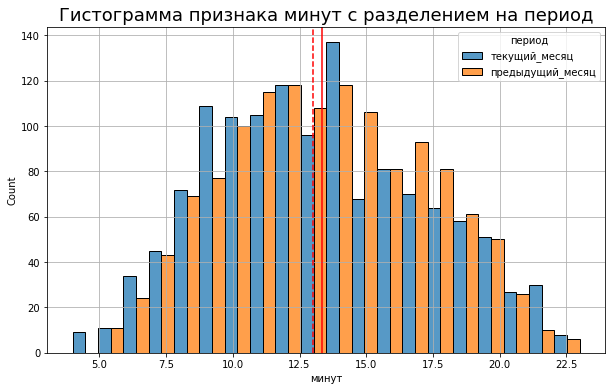

In [48]:
hist_with_hue (market_time, 'минут', 'период', bins_count=20)

In [49]:
time_pivot =market_time.pivot_table(index='период', values ='минут', aggfunc=['mean', 'median']).reset_index()

In [50]:
time_pivot.columns=['период','среднее_минуты','медиана_минуты']

In [51]:
display(time_pivot)

период  среднее_минуты  медиана_минуты
0  предыдущий_месяц       13.469545              13
1     текущий_месяц       13.211257              13

Среднее время за предыдущий месяц незначительно выше,чем за текущий, медианное значение -13 (значения предыдщуего месяца и текущего практически не отличаются.

In [52]:
def pivot_bar_plot(df, col1, col2):
    plt.figure(figsize=(8,6))
    plot = sns.barplot(x=col1, data=df, y=col2)
    plot.set_title(f'Рапределение по {col1}', fontsize=16)
    plot.set_xlabel('Количество', fontsize=14)

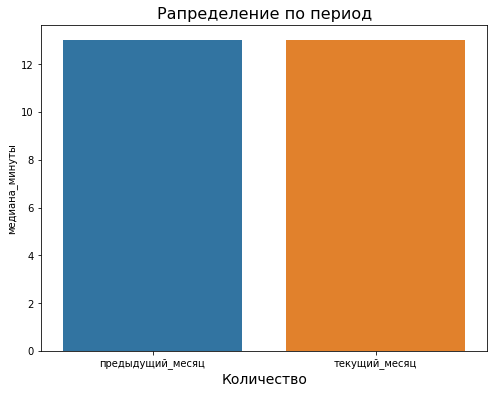

In [53]:
pivot_bar_plot(time_pivot,'период','медиана_минуты')

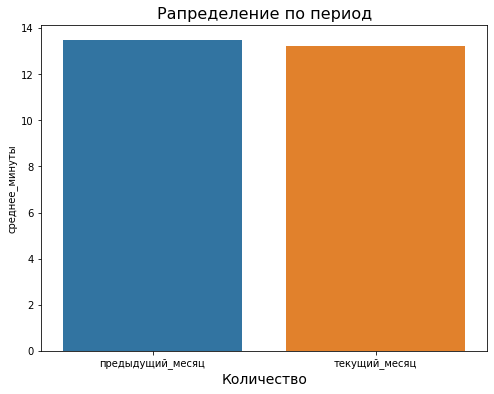

In [54]:
pivot_bar_plot(time_pivot,'период','среднее_минуты')

**Вывод:**
    На этапе исследовательского анализа были удалены 4 пользователя: 3 с нулевой выбручкой за предыущие  месяца, а также один пользователь с аномальным значением по выручке в текущем месяце

Всего в файле  <u> market_file</u> представлено было 1300 ID (4 id  были удалены из-за аномальных значений)
- Маркет_актив_6_мес: график находится в промежутке от 0.9 до 6.6,не обладет нормальным распределением,имеет выбросы, ср значение - 4.253769, медианное значение -4.2, std -1.014814
- Маркет_актив_тек_мес : показатель  принимает только значения  3, 4 и 5 , ср значение -4.011538, медианное значение -4, std -  0.696868
- Длительность : находится в промежутке от 110 до 1079, ср значение - 601.898462, медианное значение -606, std - 249.856289, выбросы отсутствуют
- Акционные_покупки :не обладает нормальным распределением, значения принимаются либо меньше 0,4, либо свыше 0,9  находится в промежутке от 0 до 0.99, ср значение -  0.319808 , медианное значение -0.24, std - 0.249843, имеет значительное количество выбросов
- Средний_просмотр_категорий_за_визит: находится в промежутке от 1 до 6, ср значение -  3.27 , медианное значение -3, std - 1.35535, выбросов нет
- Неоплаченные_продукты_штук_квартал : находится в промежутке от 0 до 10, ср значение - 2.84, медианное значение -3, std - 1.971451,есть выбросы
- Ошибка_сервиса : нормальное распрпеделение,  находится в промежутке от 0 до 9, ср значение - 4.185385, медианное значение -4, std - 1.955298, выбросов нет
- Страниц_за_визит: находится в промежутке от 1 до 20, ср значение - 8.176923, медианное значение -8, std - 3.978126 , выбросов нет
- 62%-покупательская активность осталась на прежнем уровне, 38%-снизилась.
- по 'Тип сервиса": 28,9% составляют  премиум' и 71,1% 'стандарт,
- по столбцу 'Разрешить сообщать' 73,9% польозвателей со значением 'да' и 26,1%-со значением 'нет'
- в 'Популярная_категория" 25,4% составляют Товары для детей, 19,3% - Домашний текстиль,17,2%- Косметика и аксесуары, 10,6% - Кухонная посуда, 14,1%-Техника для красоты и здоровья, 13,4% -Мелкая бытовая техника и электроника'
Всего в файле  <u>market_file</u> представлено было 1300 уникальных ID (4 id  были удаленын из-за аномальных значений):
- Выручка в у.е.: распределение нормальное,  находится в промежутке от 1 до  106862.2, ср значение - 5025.696051, медианное значение -4957.5,среднее сназчение и медиана практически совпадают,  std -  1777.704104

Всего в файле  <u>market_time</u> представлено было 1300 уникальных ID (4 id  были удалены  из-за аномальных значений):
- минут:имеет нормальное распределение, среднее значение и медиана незначительно отличаются друг от друга, медиана составляет 15 минут.Значения находится в промежутке от 4 до  23, ср значение - 13.336154, медианное значение -13 (значения предыдщуего месяца и текущего практически не отличаются, среднее время за предыдущий месяц чуть выше,чем за текущий), std - 4.080198 

Всего в файле  <u> money </u> представлено было 1300 уникальных ID (4 id  были удалены из-за аномальных значений):
- Прибыль в тыс.у.е.: показатель имеет нормальноераспределение , среднее значение и медиана примерно совпадают, но есть выбросы, и большая часть выбросов находится в правой части boxplot,  находится в промежутке от 0.86 до 7.43, ср значение - 3.996631, медианное значение -4.045, std - 1.013722.

-     На этапе исследовательского анализа были удалены 4 пользователя: 3 с нулевой выбручкой за предыущие  месяца, а также один пользователь с аномальным значением по выручке в текущем месяце  и по результатам анализа было принято решение удалить выбросы по столбцам  'Неоплаченные_продукты_штук_квартал' и Маркет_актив_6_мес

## Шаг. Объединение таблиц

4.1 Объедините таблицы market_file.csv, market_money.csv, market_time.csv. Данные о прибыли из файла money.csv при моделировании вам не понадобятся. 
4.2 Учитывайте, что данные о выручке и времени на сайте находятся в одном столбце для всех периодов. В итоговой таблице сделайте отдельный столбец для каждого периода.

мы в файле market_money удалили один id.Удалим его и в  market_file, market_time

In [55]:
market_file = market_file.query('id!=215380')

In [56]:
market_time = market_time.query('id!=215380')

In [57]:
len(market_file['id'].unique())

1296

In [58]:
len(market_money['id'].unique())

1296

In [59]:
len(market_time['id'].unique())

1296

In [60]:
series_list = [market_money['id'], market_file['id'], market_time['id']]

for i in range(len(series_list)):
    for j in range(len(series_list)):
        if i != j:
            diff_ij = list(set(series_list[i].unique()) - set(series_list[j].unique()))
            diff_ji = list(set(series_list[j].unique()) - set(series_list[i].unique()))
            print(f"Уникальные значения в series_list[{i}], отсутствующие в series_list[{j}]: {diff_ij}")
            print(f"Уникальные значения в series_list[{j}], отсутствующие в series_list[{i}]: {diff_ji}")
            print('---')

Уникальные значения в series_list[0], отсутствующие в series_list[1]: []
Уникальные значения в series_list[1], отсутствующие в series_list[0]: []
---
Уникальные значения в series_list[0], отсутствующие в series_list[2]: []
Уникальные значения в series_list[2], отсутствующие в series_list[0]: []
---
Уникальные значения в series_list[1], отсутствующие в series_list[0]: []
Уникальные значения в series_list[0], отсутствующие в series_list[1]: []
---
Уникальные значения в series_list[1], отсутствующие в series_list[2]: []
Уникальные значения в series_list[2], отсутствующие в series_list[1]: []
---
Уникальные значения в series_list[2], отсутствующие в series_list[0]: []
Уникальные значения в series_list[0], отсутствующие в series_list[2]: []
---
Уникальные значения в series_list[2], отсутствующие в series_list[1]: []
Уникальные значения в series_list[1], отсутствующие в series_list[2]: []
---


Как мы видим, во всех списках присутствуют одни и те же ID, значит, объединять таблицы можно любым способо без потери данных

Сначала преобразуем таблицы в сводные

In [61]:
market_money_pivot = market_money.pivot_table(index='id', columns='период',values='выручка', aggfunc='sum').reset_index()

In [62]:
display(market_money.head())

id               период  выручка
3  215349  препредыдущий_месяц   4.4720
4  215349        текущий_месяц   4.9716
5  215349     предыдущий_месяц   5.2160
6  215350  препредыдущий_месяц   4.8260
7  215350        текущий_месяц   5.0584

In [63]:
display(market_money_pivot)

период      id  предыдущий_месяц  препредыдущий_месяц  текущий_месяц
0       215349            5.2160                4.472         4.9716
1       215350            5.4575                4.826         5.0584
2       215351            6.1580                4.793         6.6104
3       215352            5.8075                4.594         5.8725
4       215353            4.7385                5.124         5.3885
...        ...               ...                  ...            ...
1291    216643            3.6640                4.704         4.7417
1292    216644            4.7290                5.299         5.3530
1293    216645            5.1600                5.334         5.1392
1294    216646            4.9230                4.725         5.2246
1295    216647            4.7200                5.183         4.4483

[1296 rows x 4 columns]

In [64]:
market_money_pivot.columns=['id','выручка_предыдущий_месяц','выручка_препредыдущий_месяц','выручка_текущий_месяц']

In [65]:
market_time_pivot = market_time.pivot_table(index='id', columns='период',values='минут', aggfunc='sum').reset_index()

In [66]:
market_time_pivot.columns = ['id','мин_предыдущий_месяц','мин_текущий_месяц']

In [67]:
display (market_time_pivot)

id  мин_предыдущий_месяц  мин_текущий_месяц
0     215349                    12                 10
1     215350                     8                 13
2     215351                    11                 13
3     215352                     8                 11
4     215353                    10                 10
...      ...                   ...                ...
1291  216643                    14                  7
1292  216644                    12                 11
1293  216645                    12                 18
1294  216646                    18                  7
1295  216647                    15                 10

[1296 rows x 3 columns]

In [68]:
df=pd.merge(market_file,market_money_pivot,on='id',how='outer')

In [69]:
df=pd.merge(df,market_time_pivot,on='id',how='outer')

In [70]:
display (df.head())

id покупательская_активность тип_сервиса разрешить_сообщать  \
0  215349                 Снизилась     премиум                 да   
1  215350                 Снизилась    стандарт                нет   
2  215351                 Снизилась    стандарт                 да   
3  215352                 Снизилась    стандарт                нет   
4  215353                 Снизилась    стандарт                 да   

   маркет_актив_6_мес  маркет_актив_тек_мес  длительность  акционные_покупки  \
0                 4.4                     4           819               0.75   
1                 4.9                     3           539               0.14   
2                 3.2                     5           896               0.99   
3                 5.1                     3          1064               0.94   
4                 3.3                     4           762               0.26   

  популярная_категория  средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    4   
1    Домашний текстиль                                    5   
2     Товары для детей                                    5   
3     Товары для детей                                    3   
4    Домашний текстиль                                    4   

   неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  \
0                                   4               2                 5   
1                                   2               1                 5   
2                                   0               6                 4   
3                                   2               3                 2   
4                                   1               1                 4   

   выручка_предыдущий_месяц  выручка_препредыдущий_месяц  \
0                    5.2160                        4.472   
1                    5.4575                        4.826   
2                    6.1580                        4.793   
3                    5.8075                        4.594   
4                    4.7385                        5.124   

   выручка_текущий_месяц  мин_предыдущий_месяц  мин_текущий_месяц  
0                 4.9716                    12                 10  
1                 5.0584                     8                 13  
2                 6.6104                    11                 13  
3                 5.8725                     8                 11  
4                 5.3885                    10                 10

In [71]:
print(df.isna().sum())

id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
выручка_предыдущий_месяц               0
выручка_препредыдущий_месяц            0
выручка_текущий_месяц                  0
мин_предыдущий_месяц                   0
мин_текущий_месяц                      0
dtype: int64


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 0 to 1295
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   покупательская_активность            1296 non-null   object 
 2   тип_сервиса                          1296 non-null   object 
 3   разрешить_сообщать                   1296 non-null   object 
 4   маркет_актив_6_мес                   1296 non-null   float64
 5   маркет_актив_тек_мес                 1296 non-null   int64  
 6   длительность                         1296 non-null   int64  
 7   акционные_покупки                    1296 non-null   float64
 8   популярная_категория                 1296 non-null   object 
 9   средний_просмотр_категорий_за_визит  1296 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 11  ошибка_сервиса                

In [73]:
df.shape

(1296, 18)

как Мы видим, вошли все id (1299) ,все столбцы(18),  пропуски отсутствуют

**Вывод на этапе объединения данных"**:
- Объединили все таблицы
- Все таблицы содержали одних и тех же пользователей
- после объединения были удалены выбросы по столбцам 'Маркет_актив_6_мес' b 'Неоплаченные_продукты_штук_квартал' (48 in bkb 45 от первонаальной выборки )

## Шаг. Корреляционный анализ

In [74]:
phik_matrix = df.drop('id',axis=1).phik_matrix()

interval columns not set, guessing: ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц', 'мин_предыдущий_месяц', 'мин_текущий_месяц']


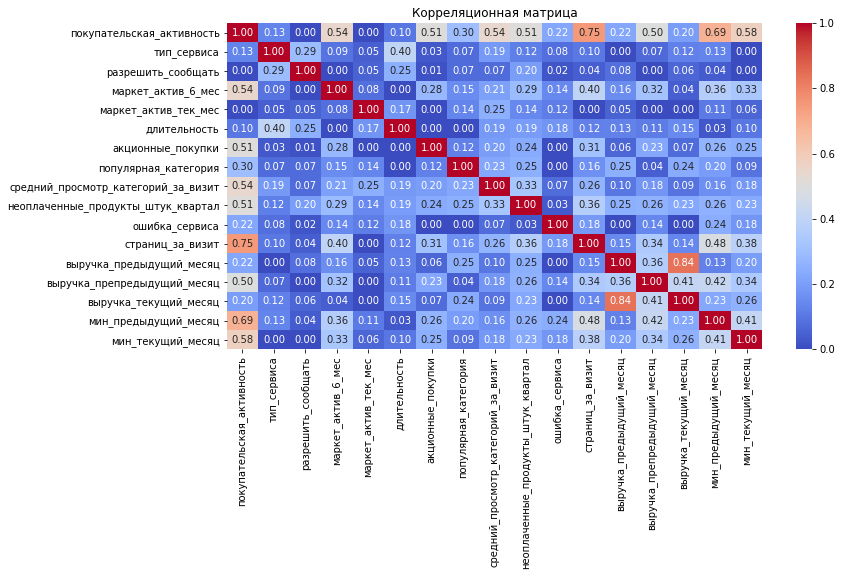

In [75]:
plt.figure(figsize=(12, 6)) 
sns.heatmap(phik_matrix, annot=True,  fmt=".2f",cmap='coolwarm') 
plt.title("Корреляционная матрица")
plt.show()

Тип взаимосвязи между целевым  (покупательская активность) и входными признаками:

В соответствии со шкалой Чеддока есть: 

 -  <u> высокая (тесная) корреляция </u>  между целевой переменной  и *страниц за визит* (коэффициент корреляции равен 0.75);
 -   <u> заметная корреляция </u> между целевой переменной и признаками:
- *мин (предыдущий месяц)* ((коэффициент корреляции равен 0.68);
- *мин (текущий месяц)*(коэффициент корреляции равен 0.58);
- *маркет_актив_6_мес*(коэффициент корреляции равен 0.54);
- *средний просмотр категорий за визит*(коэффициент корреляции равен 0.54);
- *акционные покупки*(коэффициент корреляции равен 0.50);
- *неоплаченные_продукты_шт_квартал*(коэффициент корреляции равен 0.50);
 -   <u> умеренная корреляция </u> между целевой переменной и признаками:
- *выручка_предпредыдущий_месяц* (коэффициент корреляции равен 0.48);
- *популрная_категория* (коэффициент корреляции равен 0.30);

Согласно шкале Чеддока матрицы корреляции :
 -  <u> очень высокая (тесная) корреляция </u>  между фичами отсутствует.
 -  <u>высокая (тесная) корреляция </u> есть между признаками:
- *выручка_препредыдущий_месяц* и *акционные покупки* (коэффициент корреляции равен 0.75);
- *выручка_предпредыдущий_месяц* и *выручка_предыдущий_месяц*(коэффициент корреляции равен 0.73);
- *выручка_текущий_месяц* и *выручка_предыдущий_месяц*(коэффициент корреляции равен 0.73);
 -  <u> Заметная корреляция </u> между признаками:
- *выручка_предыдущий_месяц* и *акционные покупки* (коэффициент корреляции равен 0.64);

Из матрицы корреляций видно, что некоторые признаки сильно взаимосвязаны друг с другом, но нет связи выше 0.9 поэтому признаки удалять не будем

In [76]:
# Определим функцию подсчета VIF
def calc_vif(df):

    vif_data = pd.DataFrame()
    vif_data["variables"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return vif_data

In [77]:
df_with_const = add_constant(df)

In [78]:
df.columns

Index(['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит', 'выручка_предыдущий_месяц',
       'выручка_препредыдущий_месяц', 'выручка_текущий_месяц',
       'мин_предыдущий_месяц', 'мин_текущий_месяц'],
      dtype='object')

In [79]:
calc_vif(df_with_const[df_with_const.select_dtypes(include='number').columns])

variables            VIF
0                                 const  591797.974424
1                                    id       1.794333
2                    маркет_актив_6_мес       1.240608
3                  маркет_актив_тек_мес       1.044579
4                          длительность       1.102362
5                     акционные_покупки       1.197299
6   средний_просмотр_категорий_за_визит       1.186217
7    неоплаченные_продукты_штук_квартал       1.217164
8                        ошибка_сервиса       1.079365
9                      страниц_за_визит       1.522282
10             выручка_предыдущий_месяц       4.287136
11          выручка_препредыдущий_месяц       1.630913
12                выручка_текущий_месяц       3.905648
13                 мин_предыдущий_месяц       1.594010
14                    мин_текущий_месяц       1.387988

Как мы видим, VIF выше 5 отсутствует

**Вывод:**
  В соответствии со шкалой Чеддока есть: 

 -  <u> высокая (тесная) корреляция </u>  между целевой переменной  и *страниц за визит* (коэффициент корреляции равен 0.75);
 -   <u> заметная корреляция </u> между целевой переменной и признаками:
- *мин (предыдущий месяц)* ((коэффициент корреляции равен 0.68);
- *мин (текущий месяц)*(коэффициент корреляции равен 0.58);
- *маркет_актив_6_мес*(коэффициент корреляции равен 0.54);
- *средний просмотр категорий за визит*(коэффициент корреляции равен 0.54);
- *акционные покупки*(коэффициент корреляции равен 0.50);
- *неоплаченные_продукты_шт_квартал*(коэффициент корреляции равен 0.50);
 -   <u> умеренная корреляция </u> между целевой переменной и признаками:
- *выручка_предпредыдущий_месяц* (коэффициент корреляции равен 0.48);
- *популрная_категория* (коэффициент корреляции равен 0.30);

Согласно шкале Чеддока матрицы корреляции :
 -  <u> очень высокая (тесная) корреляция </u>  между фичами отсутствует.
 -  <u>высокая (тесная) корреляция </u> есть между признаками:
- *выручка_препредыдущий_месяц* и *акционные покупки* (коэффициент корреляции равен 0.75);
- *выручка_предпредыдущий_месяц* и *выручка_предыдущий_месяц*(коэффициент корреляции равен 0.73);
- *выручка_текущий_месяц* и *выручка_предыдущий_месяц*(коэффициент корреляции равен 0.73);
 -  <u> Заметная корреляция </u> между признаками:
- *выручка_предыдущий_месяц* и *акционные покупки* (коэффициент корреляции равен 0.64);
-VIF выше 5 отсутствует
Признаки на основании мультиколлинеариальности не удаляли

In [80]:
market_money.columns

Index(['id', 'период', 'выручка'], dtype='object')

In [81]:
print(market_money['период'].unique())

['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']


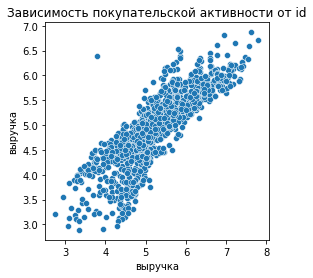

In [82]:
fig = plt.figure(figsize=(4,4))
sns.scatterplot(data=df, y="выручка_предыдущий_месяц", x="выручка_текущий_месяц")
plt.xlabel('выручка')
plt.ylabel('выручка')
plt.title('Зависимость покупательской активности от id')
plt.show()

Покупательская активность снизилась у покупателей с более ранних  id (т.е. у покупателей,которые на раньше зарегистрировались) , а у новых на прежнем уровне,что говорит, сокрее всего о смене ассортимента,политики, сегмента , котроый был интересен прежним пользователм, а сейчас новые пользователи, котроые пришли уже на новую "концепцию" сохраняют активность

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:


Это предложение не бьётся с признаком "длительности". Тут история другая, в индексе клиентов содержится утечка данных, который позволяет со стопроцентной точностью делать прогноз о их торговой активности. Что так что из-за этого можно сделать вывод что наши датасет синтетический 
    
    
    
Это видно по твоим графикам ниже, и то что мы получили детерминированный крестик тоже об этом намекает    

## Шаг. Использование пайплайнов

Прежде,чем перейти к построению пайпланов создадим доп столбец  в разнице по выручке за текущий и предыдущий месяц

In [83]:
df.columns

Index(['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит', 'выручка_предыдущий_месяц',
       'выручка_препредыдущий_месяц', 'выручка_текущий_месяц',
       'мин_предыдущий_месяц', 'мин_текущий_месяц'],
      dtype='object')

In [84]:
df2 = df.copy()

In [85]:
df2['profit_values']=df2['выручка_текущий_месяц']-df2['выручка_предыдущий_месяц']

In [86]:
df2['profit_increasing']=df2['profit_values'].apply(lambda x: 'не снизилась' if x>=0 else 'снизилась')

In [87]:
display (pd.crosstab(df2['покупательская_активность'],df2['profit_increasing']))

profit_increasing          не снизилась  снизилась
покупательская_активность                         
Прежний уровень                     562        240
Снизилась                           388        106

In [88]:
df2['profit_values_prefore']=df2['выручка_предыдущий_месяц']-df2['выручка_препредыдущий_месяц']

In [89]:
df2['profit_increasing_prefore']=df2['profit_values_prefore'].apply(lambda x: 'не снизилась' if x>=0 else 'снизилась')

In [90]:
display (pd.crosstab(df2['покупательская_активность'],df2['profit_increasing_prefore']))

profit_increasing_prefore  не снизилась  снизилась
покупательская_активность                         
Прежний уровень                     388        414
Снизилась                           333        161

как мы видим,активность не считается напрямую , выросла или упала выручка, значит, утечки данных нет

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



Тут утечки данных нет


(А вот в другом месте есть) 

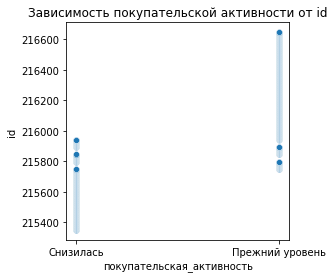

In [91]:
fig = plt.figure(figsize=(4,4))
sns.scatterplot(data=market_file, y='id', x='покупательская_активность')
plt.xlabel('покупательская_активность')
plt.ylabel('id')
plt.title('Зависимость покупательской активности от id')
plt.show()

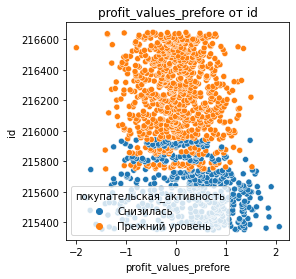

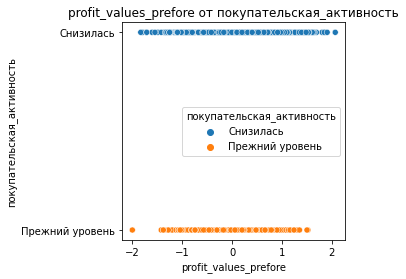

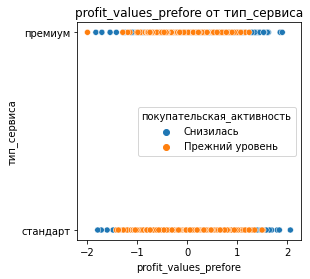

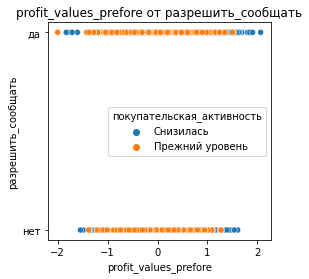

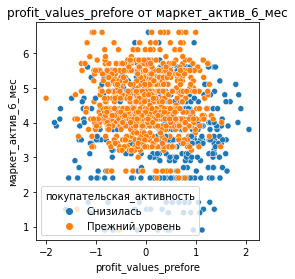

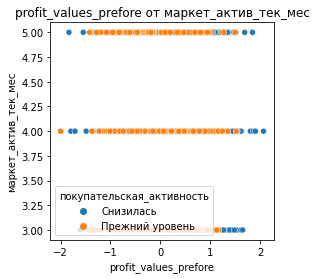

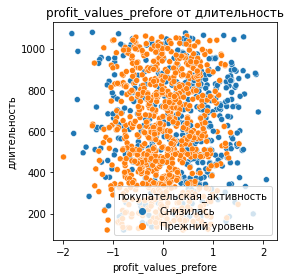

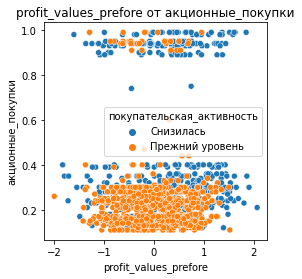

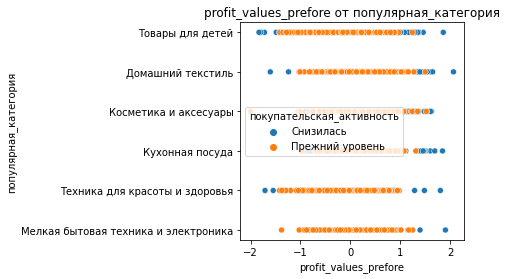

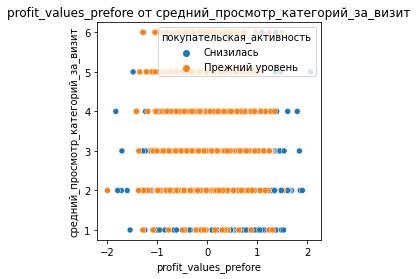

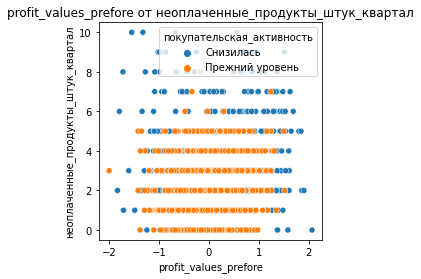

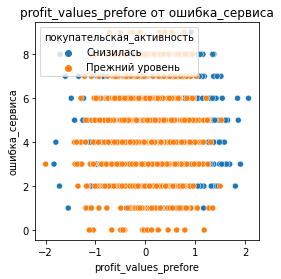

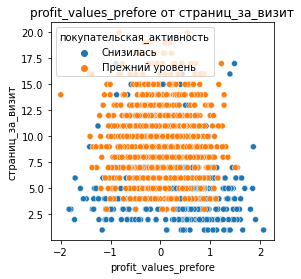

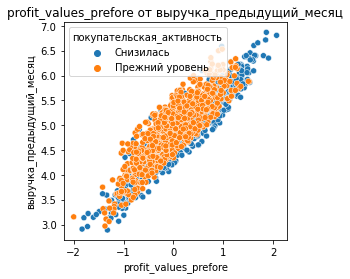

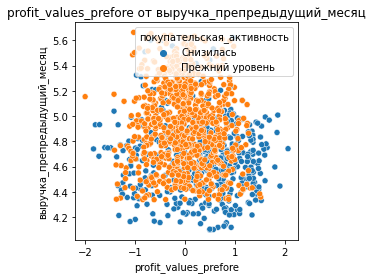

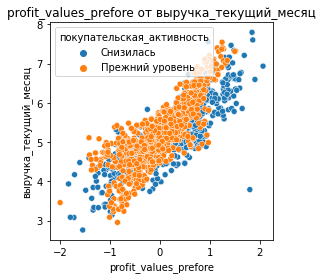

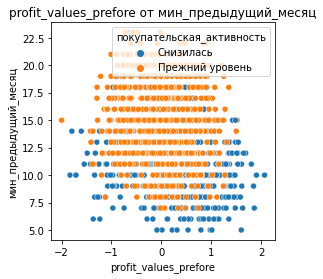

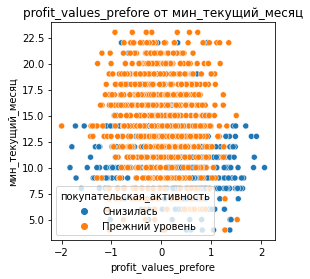

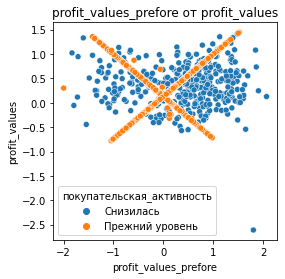

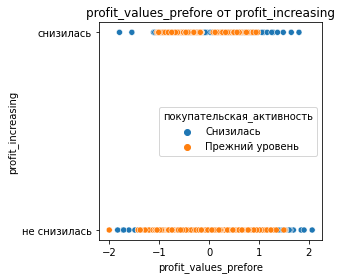

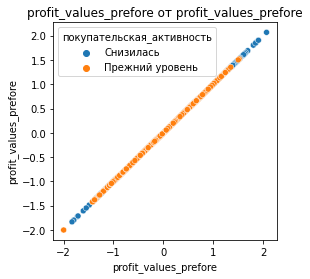

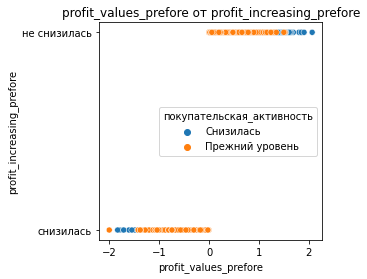

In [92]:
for i  in df2.columns:
    fig = plt.figure(figsize=(4,4))
    sns.scatterplot(data=df2, y=i, x='profit_values_prefore', hue= 'покупательская_активность')
    plt.xlabel('profit_values_prefore')
    plt.ylabel(i)
    plt.title(f'profit_values_prefore от {i}')
    plt.show()

Так как в задаче не было указано,что данные по индексу активности считаются за текущий месяц,сделаем предположение, что у нас нет утечки данных, и при предсказании модели все те же данные будут доступны на момент предсказания. В противном случае нужно было из фитчей убрать все данные текущего месяца

In [93]:
df.columns

Index(['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит', 'выручка_предыдущий_месяц',
       'выручка_препредыдущий_месяц', 'выручка_текущий_месяц',
       'мин_предыдущий_месяц', 'мин_текущий_месяц'],
      dtype='object')

In [94]:
df = df.drop('id',axis=1)

In [95]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['покупательская_активность'], axis=1),
    df['покупательская_активность'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = df['покупательская_активность'])

X_train.shape, X_test.shape

((972, 16), (324, 16))

сначала закодируем целевой признак

In [96]:
# создайте экземпляр класса LabelEncoder для кодирования целевого признака
label_encoder = LabelEncoder()

# обучите модель и трансформируйте тренировочную выборку 
y_train = label_encoder.fit_transform(y_train)

# трансформируем тестовую выборку
y_test = label_encoder.transform(y_test)

In [97]:
print(label_encoder.classes_) 

['Прежний уровень' 'Снизилась']


 

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:


 

Правильно что сделала проверку, и инструмент для кодирования хороший использовала



 
 

Целевой признак закодирован: 
- 'Прежний уровень": 0
- "Снизилась': 1

In [98]:
# Создадим списки с названиями признаков
ohe_columns = ['разрешить_сообщать', 'популярная_категория']
num_columns = X_train.select_dtypes(include='number').columns
ord_columns = ['тип_сервиса']

In [99]:
# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='error', sparse_output=False))
    ]
    )
# создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['стандарт', 'премиум'], 
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)
# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)
# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:


 
- 'passthrough' не забыт
- drop='first' указан
- handle_unknown='ignore'/handle_unknown='use_encoded_value'  
- unknown_value=np.nan    
  
Выглядит так что  обеспечена бесперебойная работа нашего pipeline    
     

In [100]:
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE,class_weight='balanced')],
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
 {
        'models': [LogisticRegression(random_state=RANDOM_STATE, penalty='l1', max_iter=1000,class_weight='balanced')],
        'models__solver': ['liblinear', 'saga'],  # допустимые solvers для penalty='l1'
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    
    
    # словарь для модели SVC()
    {
        'models': [SVC(random_state=RANDOM_STATE, kernel='poly',class_weight='balanced')],
        'models__degree': range(2, 3),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }    
]

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



👍class_weight='balanced'


Действительно в таргете присутствует дисбаланс. Можно попробовать его учесть 

In [101]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    verbose=2,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END models=SVC(class_weight='balanced', kernel='poly', random_state=42), models__degree=2, preprocessor__num=MinMaxScaler(); total time=   0.1s
[CV] END models=SVC(class_weight='balanced', kernel='poly', random_state=42), models__degree=2, preprocessor__num=MinMaxScaler(); total time=   0.1s
[CV] END models=SVC(class_weight='balanced', kernel='poly', random_state=42), models__degree=2, preprocessor__num=MinMaxScaler(); total time=   0.1s
[CV] END models=SVC(class_weight='balanced', kernel='poly', random_state=42), models__degree=2, preprocessor__num=MinMaxScaler(); total time=   0.0s
[CV] END models=SVC(class_weight='balanced', kernel='poly', random_state=42), models__degree=2, preprocessor__num=MinMaxScaler(); total time=   0.1s
[CV] END models=LogisticRegression(class_weight='balanced', max_iter=1000, penalty='l1',
                   random_state=42), models__C=4, models__solver=saga, preprocessor__num=StandardScaler()

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              sparse_output=False))]),
                                                                               ['разрешить_сообщать',
                                                                                'популярная_категория']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('simpleImputer...
                                                                       random_state=42)],
                                         'models__C': range(1, 5),
                                         'models__solver': ['liblinear',
                                                            'saga'],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [SVC(class_weight='balanced',
                                                        kernel='poly',
                                                        random_state=42)],
                                         'models__degree': range(2, 3),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc', verbose=2)


 


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:

 
    

- Полезно замерить время исполнения кода в самых тяжёлых ячейке, это можно сделать с помощью магической функции %%time или библиотеки time. И тогда коллеге работающие с твоим кодом будут ориентироваться сколько займёт время обучение модели. И стоит ждать или можно попить чайку )
    
           
- Можно разговорить модельку с помощью подачи verbose = 3 (Чтобы отслеживать процессы обучения в режиме онлайн), а чтобы выводилось не только метрика   по которой ты подбираешь гиперпараметры, но целый список из метрик (может  добавить scoring=['Метрика', '', ''...], а через refit   указать по какой метрике подбираются гиперпараметры )     
  
 
    

In [102]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

# проверьте работу модели на тестовой выборке
# рассчитайте прогноз на тестовых данных
y_test_pred = randomized_search.predict_proba(X_test) [:,1]
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred)}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['разрешить_сообщать',
                                                   'популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                            

Лучша модель: LogisticRegression(C=1, class_weight='balanced', max_iter=1000,
                                    penalty='l1', random_state=42,
                                    solver='liblinear')))])
Метрика ROC-AUC на тестовой выборке: 0.916


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



👍




<div class="alert alert-warning">
 


Совет 🤔:

 
    
	Метрика лучшей модели на тренировочной выборке: 0.8929938542581212
	
    
- Это звучит  не очень хорошо с точки зрения теории. Ведь .best_score_ это метрика по кросс валидацинной выборке а не на тренировочной. Мы не выбираем лучшую модель по результату на тренировочный выборке, потому что она ничего не показывает. Например если взять дерево решение достаточно большой глубины, то метрика на тренировочной будет равна 100%, но это результат запоминание данных, а не обобщения. Раньше был проект "ведения машинное обучение", где чётко об этом рассказывалось - обучаемся на train, гиперпараметры подбираем по валидационной выборке (в случаи GS кроссвалидационной), а затем проводим финальное тестирование. В прежнем проекте студенты вручную разбивали на три выборки и в цикле подбирали гиперпараметры, а сейчас сразу GS, но он делает то же самое: ты подаёшь него X_train, и он внутри себя разбивает его на тренировочную и валидационную (причем несколько раз)... Можешь посмотреть [тут](https://towardsdatascience.com/why-do-we-need-a-validation-set-in-addition-to-training-and-test-sets-5cf4a65550e0) с помощью VPN о логике использования выборок. Может конечно не исправлять,  но хотя бы обрати внимание на логику использования выборок,  и как работает RandomizedSearchCV/GridSearchCV 	
	 
    

Попробуем создать второй пайплайн, но при подготовке данных используем PolynomialFeatures при подготовке данных

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:


 Это было бы полезно только для линейной модели

In [103]:
# Создадим пайплайн для скейлера
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),          # Заполнение пропусков
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),  # Полиномиальные признаки 2-го порядка
    ('scaler', StandardScaler())                           # Масштабирование
])

In [104]:
# создаём общий пайплайн для подготовки данных
data_preprocessor2 = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', num_pipe , num_columns)
    ], 
    remainder='passthrough'
)
# создаём итоговый пайплайн: подготовка данных и модель
pipe_final2 = Pipeline([
    ('preprocessor', data_preprocessor2),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [105]:
randomized_search2 = RandomizedSearchCV(
    pipe_final2, 
    param_grid, 
    cv=5,
    verbose=2,
    scoring='recall',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search2.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END models=SVC(class_weight='balanced', kernel='poly', random_state=42), models__degree=2, preprocessor__num=MinMaxScaler(); total time=   0.0s
[CV] END models=SVC(class_weight='balanced', kernel='poly', random_state=42), models__degree=2, preprocessor__num=MinMaxScaler(); total time=   0.0s
[CV] END models=SVC(class_weight='balanced', kernel='poly', random_state=42), models__degree=2, preprocessor__num=MinMaxScaler(); total time=   0.0s
[CV] END models=SVC(class_weight='balanced', kernel='poly', random_state=42), models__degree=2, preprocessor__num=MinMaxScaler(); total time=   0.0s
[CV] END models=SVC(class_weight='balanced', kernel='poly', random_state=42), models__degree=2, preprocessor__num=MinMaxScaler(); total time=   0.0s
[CV] END models=LogisticRegression(class_weight='balanced', max_iter=1000, penalty='l1',
                   random_state=42), models__C=4, models__solver=saga, preprocessor__num=StandardScaler()

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              sparse_output=False))]),
                                                                               ['разрешить_сообщать',
                                                                                'популярная_категория']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('simpleImputer...
                                                                       random_state=42)],
                                         'models__C': range(1, 5),
                                         'models__solver': ['liblinear',
                                                            'saga'],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [SVC(class_weight='balanced',
                                                        kernel='poly',
                                                        random_state=42)],
                                         'models__degree': range(2, 3),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='recall', verbose=2)

In [106]:
print('Лучшая модель и её параметры:\n\n', randomized_search2.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search2.best_score_)

# проверьте работу модели на тестовой выборке
# рассчитайте прогноз на тестовых данных
y_test_pred_2 = randomized_search2.predict_proba(X_test) [:,1]
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred_2)}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['разрешить_сообщать',
                                                   'популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                            

Все равно та же модель осталась лучшей

**Вывод** 
Создали пайплан и получили,что лучшая модель составляет Лучша модель: LogisticRegression(C=1, class_weight='balanced', max_iter=1000,
                                    penalty='l1', random_state=42,
                                    solver='liblinear')
Метрика ROC-AUC на тестовой выборке: 0.916


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:






Всё отлично, осталось только    обосновать  выбор метрики  (тут можно либо подчеркнуть преимущества выбранной метрики, либо увязать с бизнес-постановкой задачи. С точки зрения бизнеса какая Метрика на твой взгляд важнее  recall или precision на классе "снизилась"?)  



<div class="alert alert-warning">
 

Совет:

 


- вопросик: указав scoring='roc_auc', чего мы добиваемся? И будет ли по-разному обучаться модель, если мы укажем другую метрику в  scoring?

 



Так как нам неизвестно, какая цель и бюджет проекта,  допустим, мы хотим удержать максимальное количество покупателей,то важной метрикой будет recall (но есть риск ,что под акционные предолжения могут попасть покупатели,  у котроых бы активность не снизилась).Если же у нас все акции дорогостоящие (например, максимальная скидка, бесплатная подписка ,доставка и т.д.) и был бы ограниченный бюджет -то  precision
Так как ниже описали, что будет устраивать опрос, то считали бы, что recall более важна. Но так как у нас не сбалансирована модель, и нам важна точность предсказания, а маркетинговые действия обычно всегда не бесплатны, то лучше считать ROC_AUC, которая повышает точность самой модели предсказывания

## Шаг. Анализ важности признаков

In [107]:
# Cохраним пайплайн который показал лучший результат
final_pipline = randomized_search.best_estimator_

Оцениv важность признаков для лучшей модели и построим график важности с помощью метода SHAP. 

In [108]:
final_model= final_pipline.named_steps['models']

In [109]:
# Извлекаем данные после preprocessor
X_train_tf = final_pipline.named_steps['preprocessor'].transform(X_train)
X_test_tf = final_pipline.named_steps['preprocessor'].transform(X_test)

In [110]:
# Извлекаем  имена фич после преобразования
feature_names = final_pipline.named_steps['preprocessor'].get_feature_names_out()

In [111]:
print(pd.DataFrame({'Featrure':feature_names,"coefficient":final_model.coef_.ravel()}).sort_values(by='coefficient'))

                                             Featrure  coefficient
3   ohe__популярная_категория_Мелкая бытовая техни...    -0.918203
11           num__средний_просмотр_категорий_за_визит    -0.626713
14                              num__страниц_за_визит    -0.575982
18                          num__мин_предыдущий_месяц    -0.526183
19                             num__мин_текущий_месяц    -0.454351
7                             num__маркет_актив_6_мес    -0.433466
4   ohe__популярная_категория_Техника для красоты ...    -0.367037
16                   num__выручка_препредыдущий_месяц    -0.244689
17                         num__выручка_текущий_месяц    -0.199489
13                                num__ошибка_сервиса    -0.108654
2           ohe__популярная_категория_Кухонная посуда    -0.061878
5          ohe__популярная_категория_Товары для детей    -0.060098
0                         ohe__разрешить_сообщать_нет    -0.040335
6                                    ord__тип_сервиса    -0.03

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



👍.coef_.


 

In [112]:
print("coefficient", final_model.coef_)

coefficient [[-0.0403353   0.         -0.06187826 -0.91820269 -0.36703678 -0.06009792
  -0.03545533 -0.43346575  0.03684133  0.075639    0.64113131 -0.62671314
   0.53975687 -0.10865351 -0.57598153  0.25061983 -0.2446894  -0.1994885
  -0.5261832  -0.45435123]]


построим график общей значимости признаков

In [113]:
explainer = shap.LinearExplainer(final_model, X_train_tf, feature_names= feature_names)
shap_values = explainer(X_train_tf)

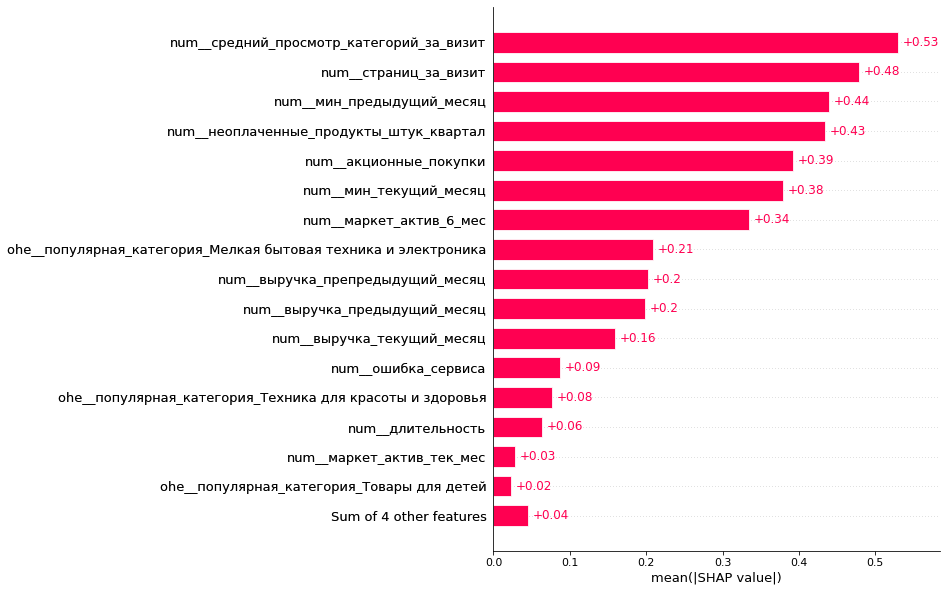

In [114]:
shap.plots.bar(shap_values, max_display=17) 

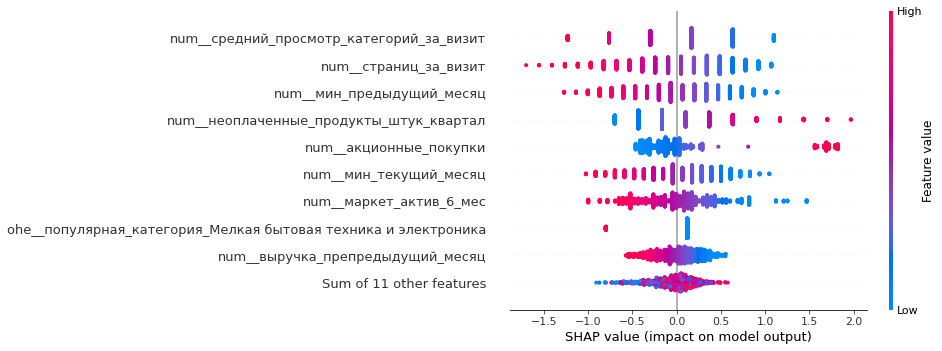

In [115]:
shap.plots.beeswarm(shap_values)

**Вывод:**
Больше всего влияет на результат фича "средним просмотр категорий за визит", чем выше это значение, тем меньше вероятности, что активность клиента снизится, на втором месте по значимости -страниц за визит, чем больше клиент посещает разных страниц, тем ниже шанс, что его активность снизится.На третьем месте идет показатель "Неоплаченные продукты_шт_квартал" -чем больше показатель, тем выше шанс, что активность клиента снизится.на 4 месте -мин в текущий месяц: чем больше времени клиент проводит на сайте, тем ниже вероятность, что его активность снизится.На пятом месте акционные покупки-чем больше акционных покупок,тем вероятнее,что активность снизится.  

  
    
<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



- есть график важности факторов, график аккуратный
    
    
- есть выводы о  направлении связи между признаками таргета
    
	
  
    
<div class="alert alert-warning">


Совет 🤔:
   
 
     
 
	
Ещё можно оценить значимость признаков с помощью  [Permutation Importance](https://scikit-learn.org/stable/modules/permutation_importance.html) Если сделать, то должно получиться что-то похожее	
	 

In [116]:
from sklearn.inspection import permutation_importance

permutation = permutation_importance(final_model, X_test_tf, y_test, scoring = 'roc_auc')

In [117]:
sorted_idx = permutation.importances_mean.argsort()[::-1]

In [118]:
for idx in sorted_idx:
    print(f"Признак {feature_names[idx]}: важность {permutation.importances_mean[idx]:.4f} ± {permutation.importances_std[idx]:.4f}")

Признак num__средний_просмотр_категорий_за_визит: важность 0.0258 ± 0.0033
Признак num__акционные_покупки: важность 0.0215 ± 0.0045
Признак num__мин_предыдущий_месяц: важность 0.0175 ± 0.0029
Признак num__страниц_за_визит: важность 0.0162 ± 0.0035
Признак num__мин_текущий_месяц: важность 0.0115 ± 0.0049
Признак num__маркет_актив_6_мес: важность 0.0056 ± 0.0036
Признак num__выручка_препредыдущий_месяц: важность 0.0029 ± 0.0024
Признак ohe__популярная_категория_Техника для красоты и здоровья: важность 0.0021 ± 0.0017
Признак num__длительность: важность 0.0015 ± 0.0009
Признак num__выручка_текущий_месяц: важность 0.0007 ± 0.0009
Признак ohe__популярная_категория_Мелкая бытовая техника и электроника: важность 0.0003 ± 0.0025
Признак ohe__популярная_категория_Кухонная посуда: важность 0.0000 ± 0.0001
Признак ohe__популярная_категория_Косметика и аксесуары: важность 0.0000 ± 0.0000
Признак ohe__популярная_категория_Товары для детей: важность -0.0002 ± 0.0001
Признак ohe__разрешить_сообщать_н

На первое место по важности вышел признак акционнные покупки,затем страниц за видит и мин_предыдущий месяц

## Шаг . Сегментация покупателей

8.1 Выполните сегментацию покупателей. Используйте результаты моделирования и данные о прибыльности покупателей.
8.2 Выберите группу покупателей и предложите, как увеличить её покупательскую активность: 
Проведите графическое и аналитическое исследование группы покупателей.
Сделайте предложения по работе с сегментом для увеличения покупательской активности.
8.3 Сделайте выводы о сегментах:
какой сегмент вы взяли для дополнительного исследования,
какие предложения вы сделали и почему.

In [119]:
df_full=pd.merge(df2,money,on='id',how='outer')

In [120]:
df_full.isna().sum()

id                                     0
покупательская_активность              1
тип_сервиса                            1
разрешить_сообщать                     1
маркет_актив_6_мес                     1
маркет_актив_тек_мес                   1
длительность                           1
акционные_покупки                      1
популярная_категория                   1
средний_просмотр_категорий_за_визит    1
неоплаченные_продукты_штук_квартал     1
ошибка_сервиса                         1
страниц_за_визит                       1
выручка_предыдущий_месяц               1
выручка_препредыдущий_месяц            1
выручка_текущий_месяц                  1
мин_предыдущий_месяц                   1
мин_текущий_месяц                      1
profit_values                          1
profit_increasing                      1
profit_values_prefore                  1
profit_increasing_prefore              1
прибыль                                0
dtype: int64

In [121]:
df_full = df_full.query('id!=215380')

In [122]:
features_list=df_full.drop('покупательская_активность',axis=1)

In [123]:
df_full['покупательская_активность'].unique()

array(['Снизилась', 'Прежний уровень'], dtype=object)

In [124]:
df_target = df_full[df_full['покупательская_активность'] =="Снизилась"]

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюер</b></font>



Совет 🤔:


 Вообще предполагалось использовать результаты прогнозирования моделью

In [125]:
display (df_target.sort_values(by="прибыль"))

id покупательская_активность тип_сервиса разрешить_сообщать  \
178  215530                 Снизилась    стандарт                 да   
490  215842                 Снизилась     премиум                 да   
20   215371                 Снизилась    стандарт                 да   
320  215672                 Снизилась    стандарт                 да   
21   215372                 Снизилась    стандарт                нет   
..      ...                       ...         ...                ...   
153  215505                 Снизилась    стандарт                 да   
209  215561                 Снизилась    стандарт                нет   
48   215400                 Снизилась    стандарт                нет   
211  215563                 Снизилась     премиум                 да   
49   215401                 Снизилась     премиум                 да   

     маркет_актив_6_мес  маркет_актив_тек_мес  длительность  \
178                 3.9                   5.0         508.0   
490                 4.3                   3.0        1036.0   
20                  3.8                   4.0         365.0   
320                 4.4                   5.0         261.0   
21                  4.8                   4.0         566.0   
..                  ...                   ...           ...   
153                 4.4                   4.0         254.0   
209                 2.4                   4.0         527.0   
48                  4.4                   5.0         304.0   
211                 3.9                   5.0         956.0   
49                  3.4                   5.0         339.0   

     акционные_покупки   популярная_категория  \
178               0.40      Домашний текстиль   
490               0.94       Товары для детей   
20                0.21      Домашний текстиль   
320               0.31        Кухонная посуда   
21                0.39  Косметика и аксесуары   
..                 ...                    ...   
153               0.31       Товары для детей   
209               0.28  Косметика и аксесуары   
48                0.94       Товары для детей   
211               0.35  Косметика и аксесуары   
49                0.30  Косметика и аксесуары   

     средний_просмотр_категорий_за_визит  ...  выручка_предыдущий_месяц  \
178                                  1.0  ...                    5.0430   
490                                  4.0  ...                    4.4080   
20                                   5.0  ...                    6.8090   
320                                  1.0  ...                    4.9110   
21                                   2.0  ...                    3.8660   
..                                   ...  ...                       ...   
153                                  2.0  ...                    3.9510   
209                                  2.0  ...                    5.9005   
48                                   1.0  ...                    5.6810   
211                                  2.0  ...                    6.0365   
49                                   2.0  ...                    5.5485   

     выручка_препредыдущий_месяц  выручка_текущий_месяц  мин_предыдущий_месяц  \
178                        4.374                 5.3914                   9.0   
490                        4.642                 4.7408                   8.0   
20                         4.742                 6.9377                  10.0   
320                        4.128                 4.8902                   9.0   
21                         4.762                 4.0922                   9.0   
..                           ...                    ...                   ...   
153                        4.698                 3.9822                   7.0   
209                        4.420                 6.1748                   7.0   
48                         4.439                 5.6914                  11.0   
211                        4.985                 6.1145                  10.0   
49    

In [126]:
df_target.shape

(494, 23)

Таким образом у нас 497 польозвателей, у которых снизилась активность

Прежде всего нам нужно сохранить клиентов, которые приносят нам больше прибыли

In [127]:
phik_matrix2 = df_target.drop(['id','покупательская_активность'], axis=1).phik_matrix()

interval columns not set, guessing: ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц', 'мин_предыдущий_месяц', 'мин_текущий_месяц', 'profit_values', 'profit_values_prefore', 'прибыль']


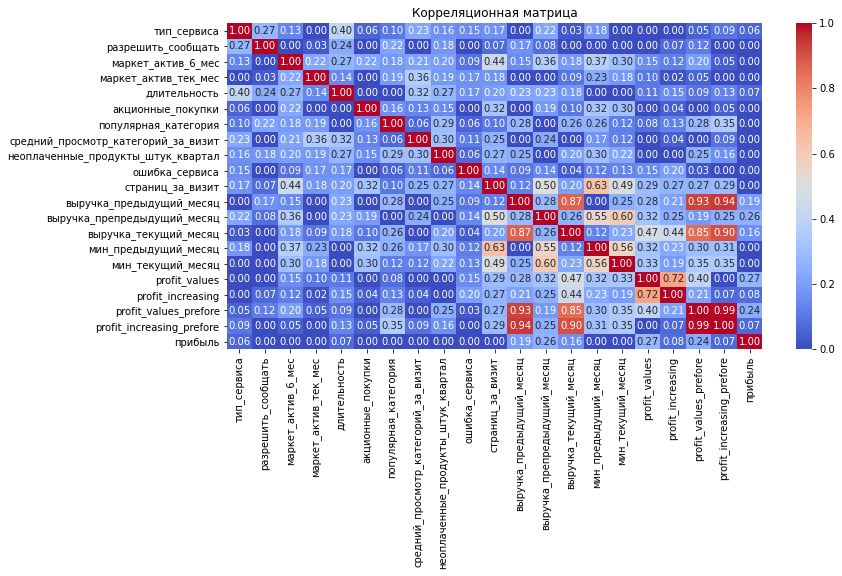

In [128]:
plt.figure(figsize=(12, 6)) 
sns.heatmap(phik_matrix2, annot=True,  fmt=".2f",cmap='coolwarm') 
plt.title("Корреляционная матрица")
plt.show()

Как мы видим,у нас нет корректилирующих с выручкой столбцов,кроме как выручки за текущий и предыдщуие периоды,что логично

In [129]:
df_target['прибыль'].describe()

count    494.000000
mean       4.001154
std        0.976446
min        1.060000
25%        3.305000
50%        4.050000
75%        4.640000
max        7.430000
Name: прибыль, dtype: float64

Проанализируем 25% покупателей, котроые приносят нам больше всех прибыли

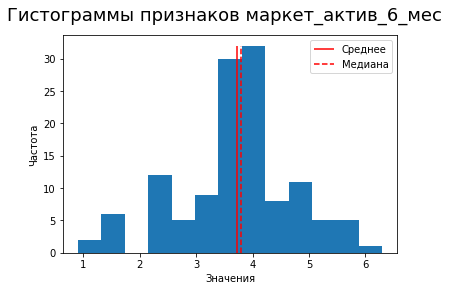

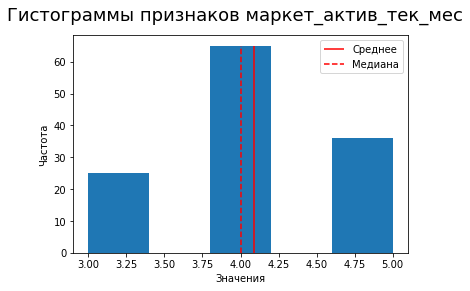

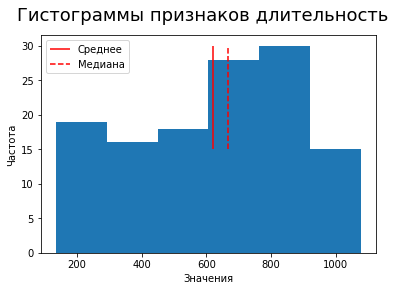

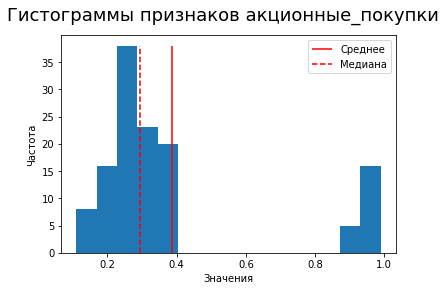

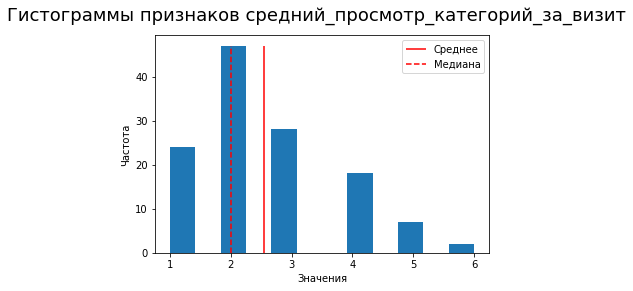

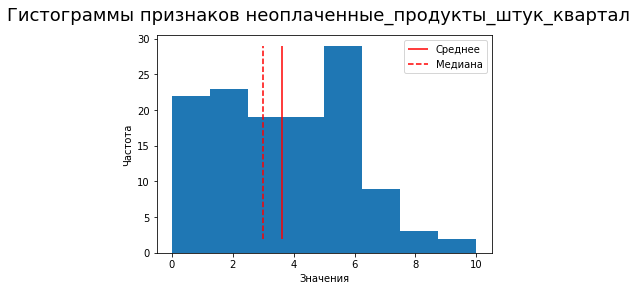

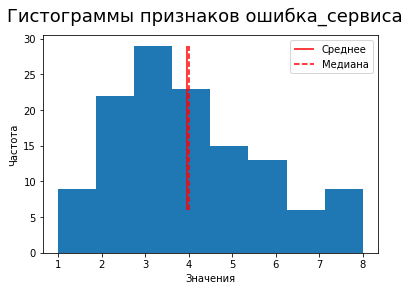

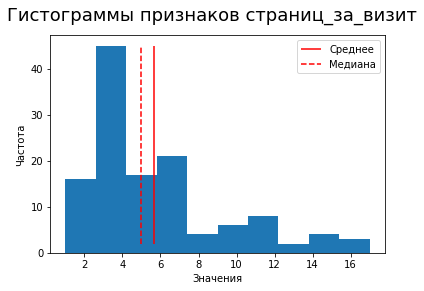

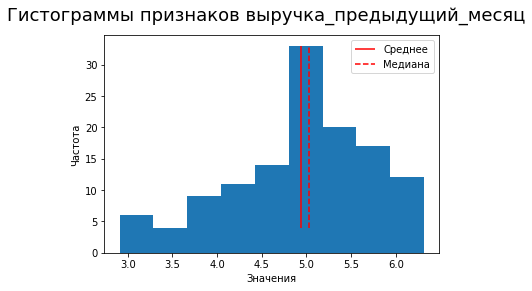

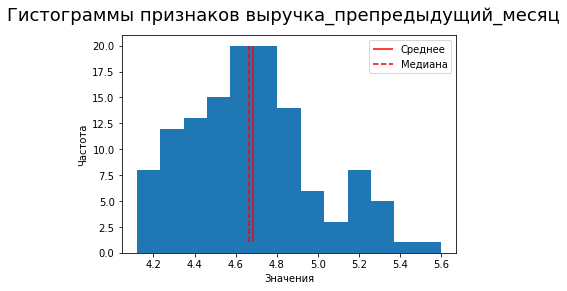

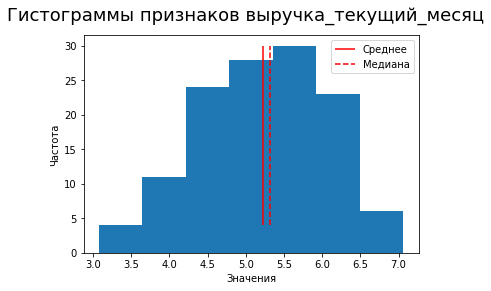

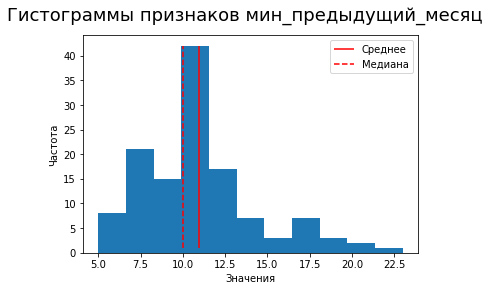

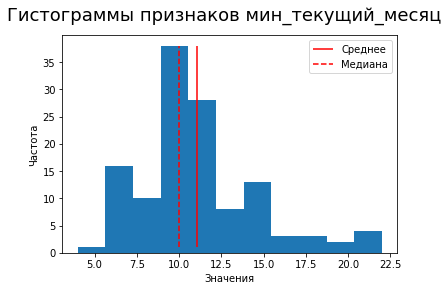

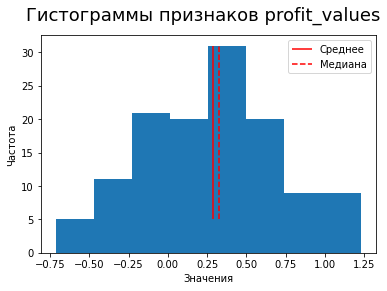

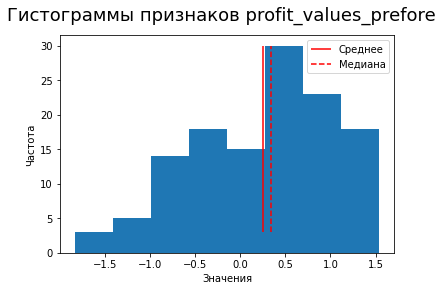

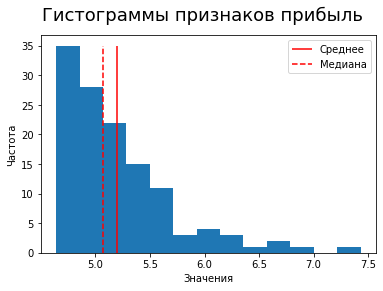

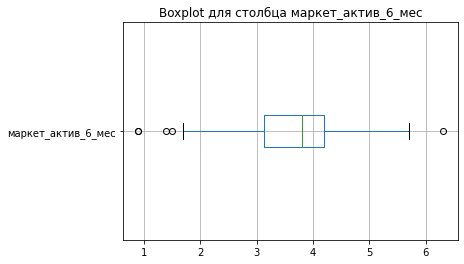

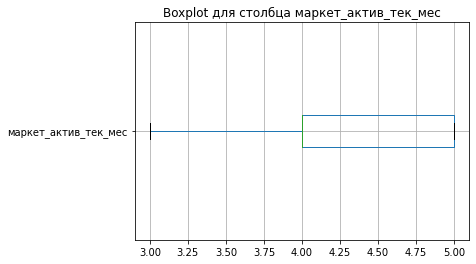

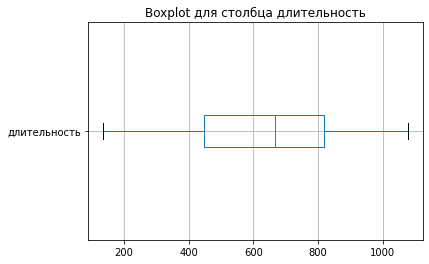

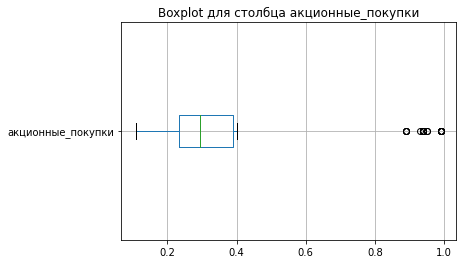

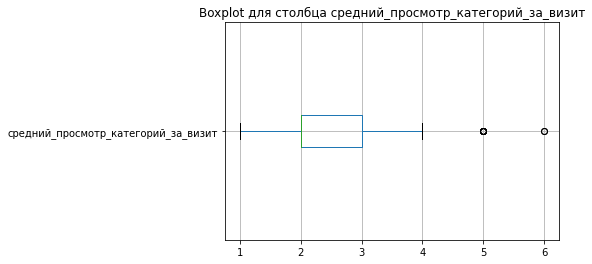

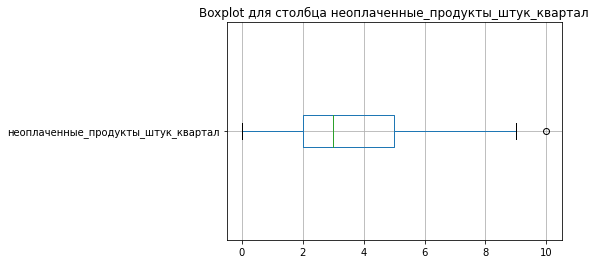

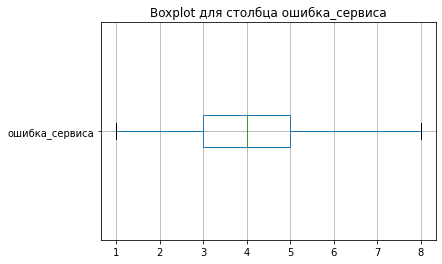

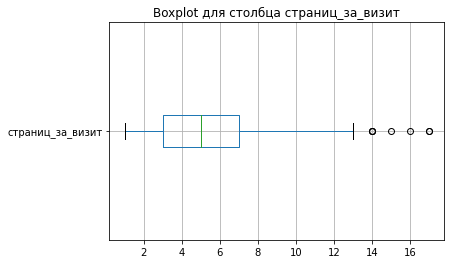

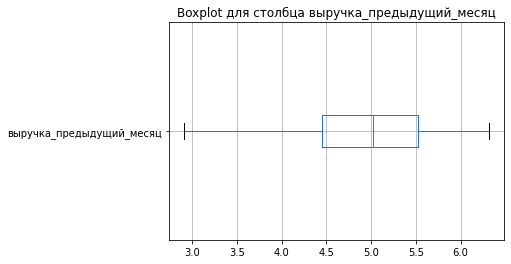

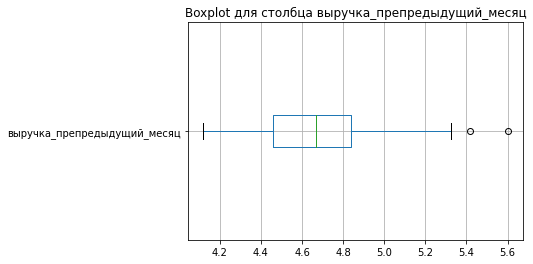

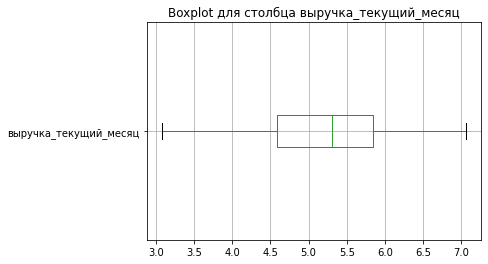

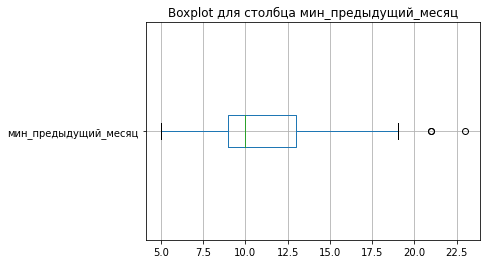

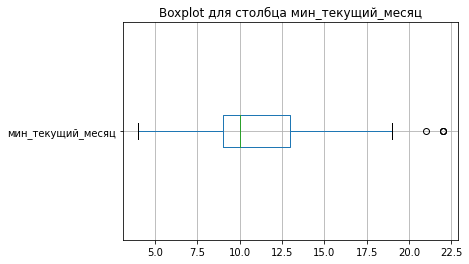

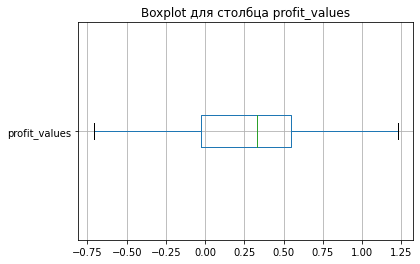

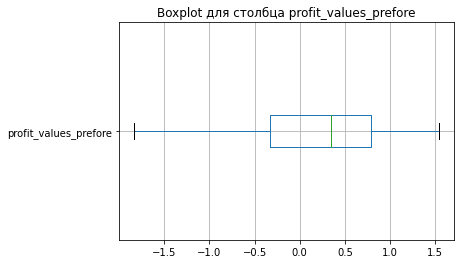

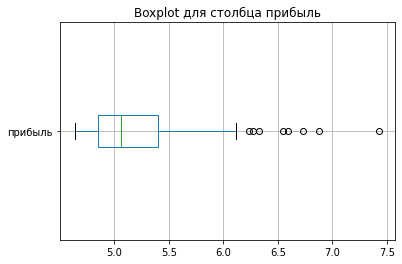

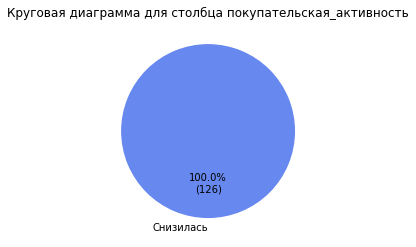

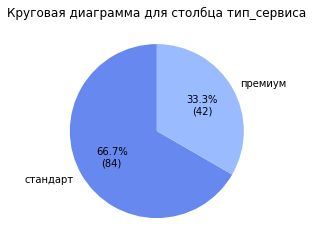

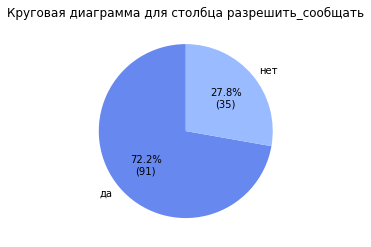

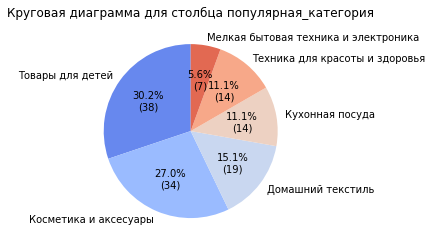

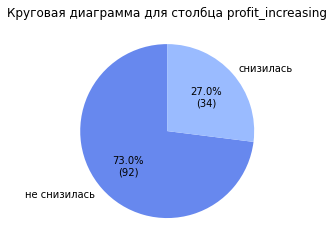

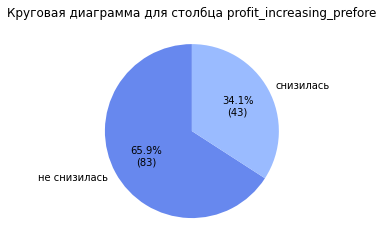

Графики построены по всем столбцам


In [130]:
graf_analysis(df_target.query("прибыль >= 4.64").drop('id',axis=1))

Как мы видим, из этих 25% покупателей, которые приносят нам большую прибыль и у которых снизилась покупательская активность,самые популярные категории -Товары для детей (38%) и Косметика и аксессуары (30%), домашний текстиль (20%),т.е. это скорее всего женщины.93% из этой кагорты дали согласие на маркетинговую коммуникацию.68%  процентов покупают по стандартной подписке, а 42% -по премимум,в среднем они проводят 10 минут на сайте (столько же, как и в преыдущий месяц),помещают 5-6 страниц за визит, 3-4 неоплаченных продуктов в квартал ,просматривают 2-3 категории за визит,соверщают 0,3-0,4 акционные покупки за визит, по длительности проводят 600 мин, в среднем 4 маркетинговой активности в текущем месяце,3.4 маркетинговой активности в среднем за 6 мес

Проверим, какой портрет у нас по группе, которая приносит прибыль более 4,64 млн, котроые приносят нам больше всего выручки,но активность по которым у нас повышается

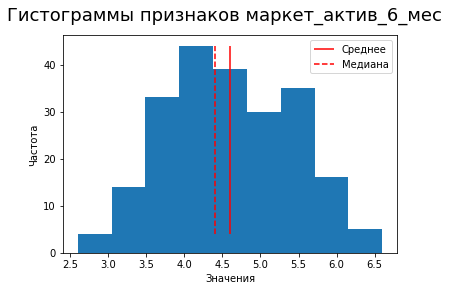

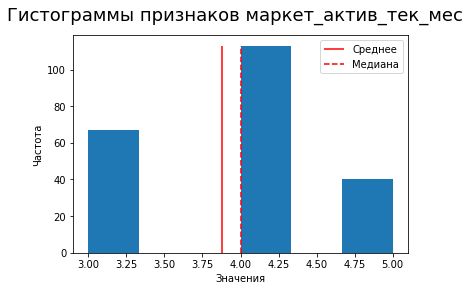

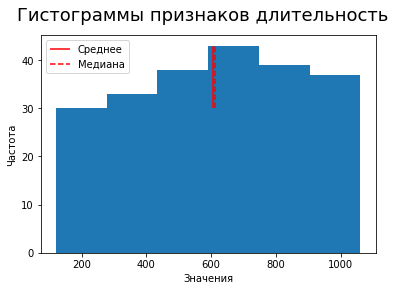

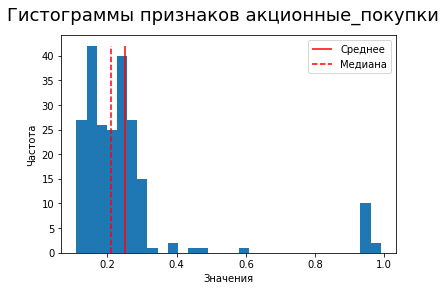

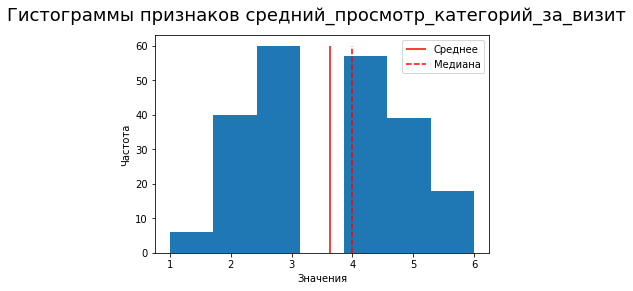

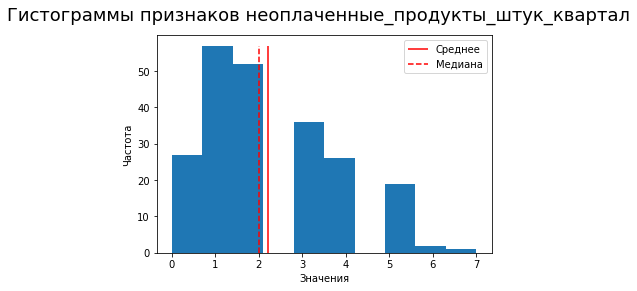

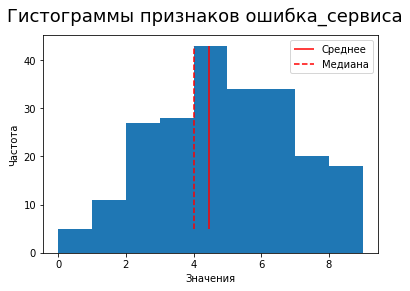

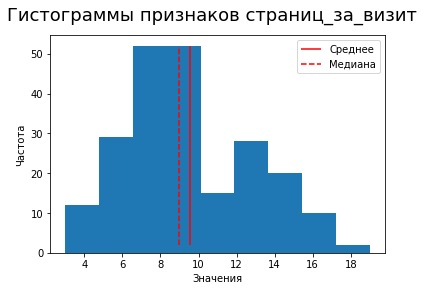

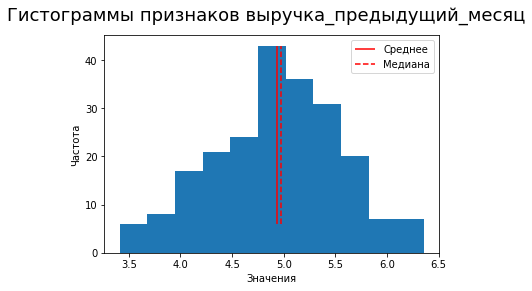

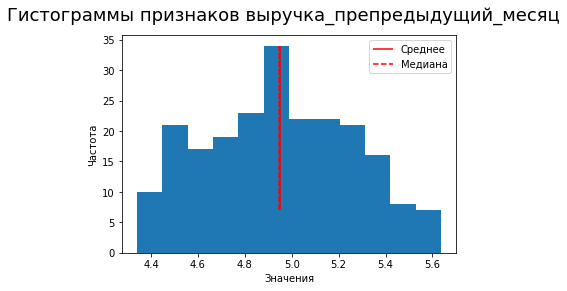

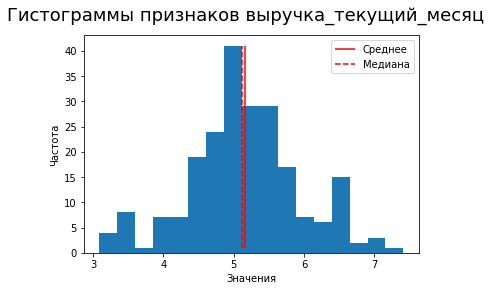

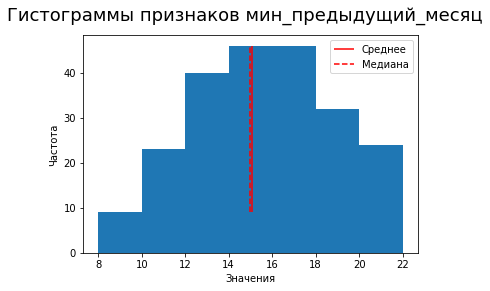

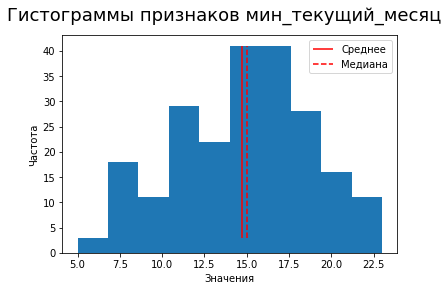

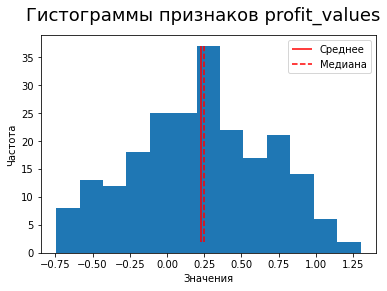

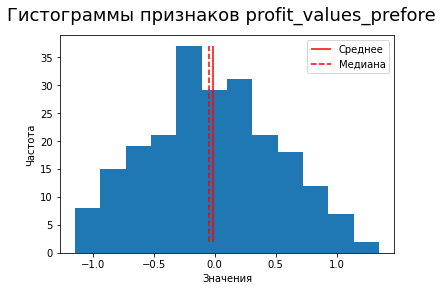

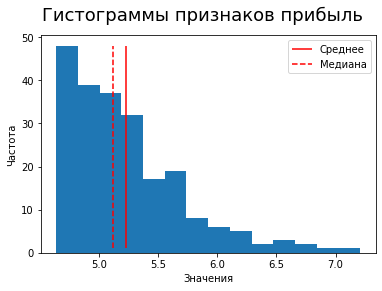

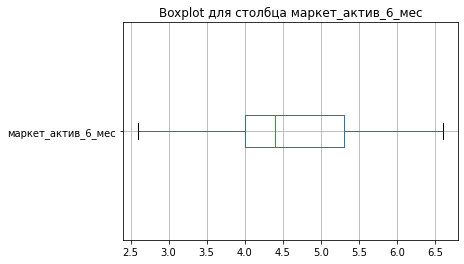

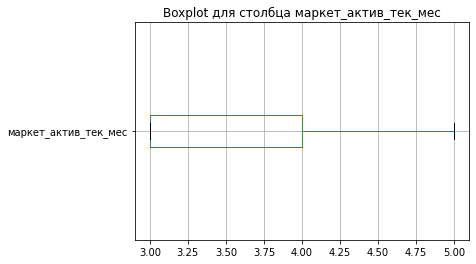

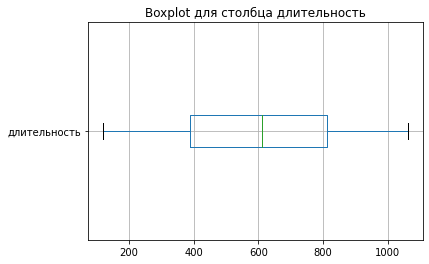

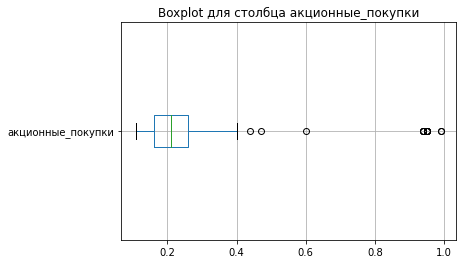

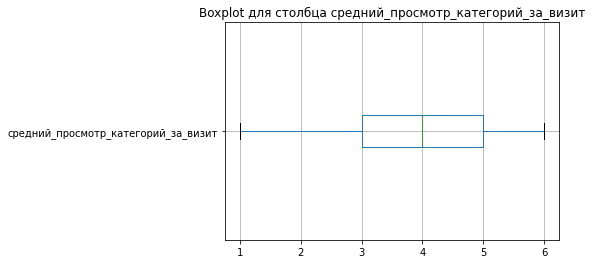

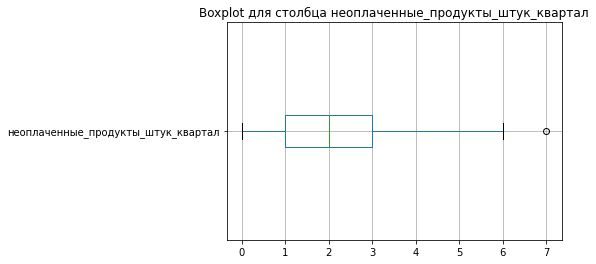

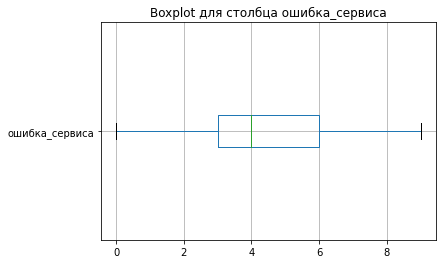

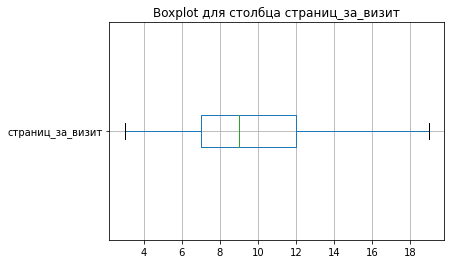

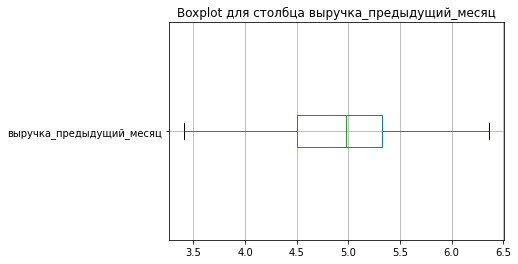

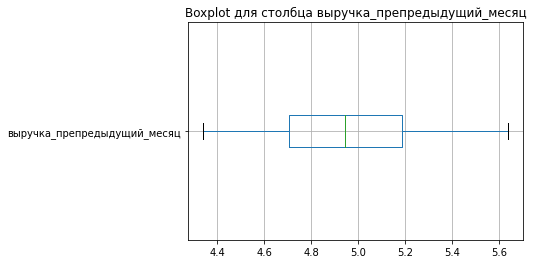

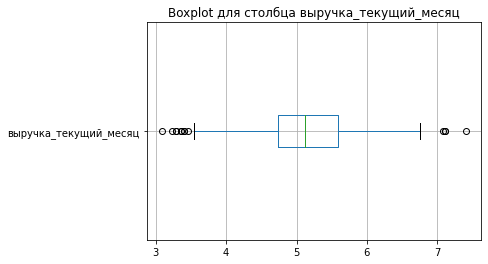

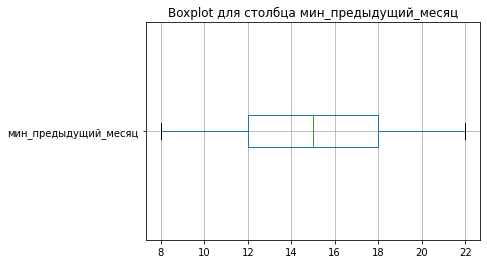

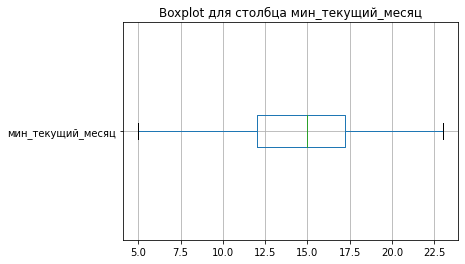

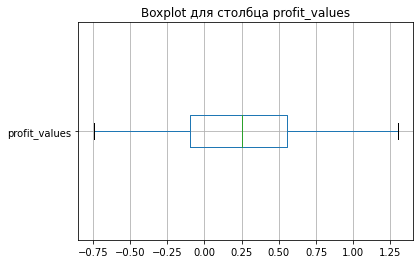

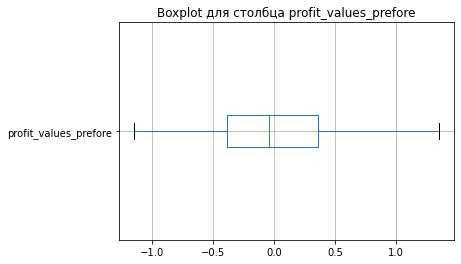

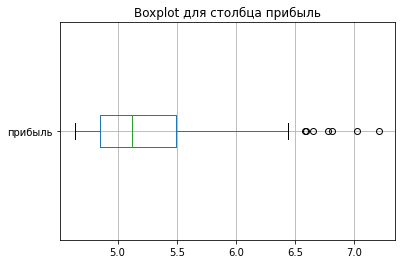

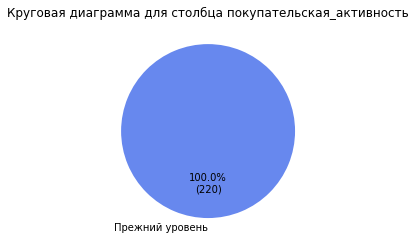

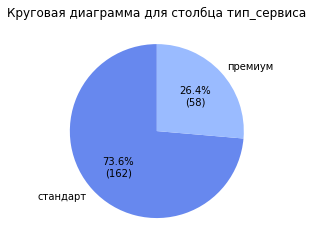

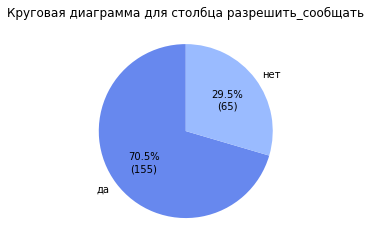

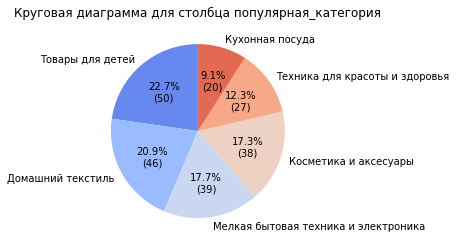

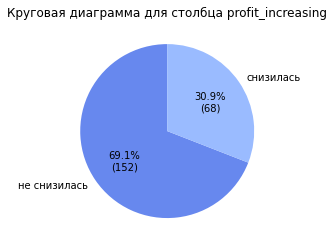

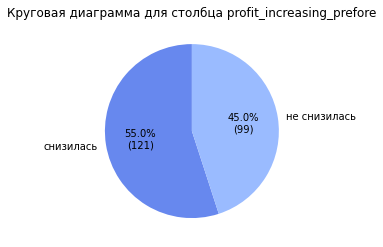

Графики построены по всем столбцам


In [131]:
graf_analysis(df_full[df_full['покупательская_активность'] =="Прежний уровень"].query("прибыль >= 4.64").drop('id',axis=1))

Как мы видим, в данной категории больше всего покупают домашний текстиь (21%), товары для детей (23%),мелкая бытовая техника и электроника (18%). В данной категории меньший процент, кто разрешил маркетинговые коммуникации (71%), Больше процента по стандартной подписке (74%),они проводят 15 минут на сайте в текущем месяце (столько же и в предыдущем), смотрят 9-10 страниц за визит, смотрят 3-4 категории за визит, акционные покупки-0,2-0,3 .Длительность также 600 мин, маркетинговая активность-примерно 4 активности в текущем месяце и 4,5 за предыдущие 6 мес

Проанализируем признаки, котроые влияют на покупательскую активность, выделем те, котроые являются следствием снижения интереса и мы на них влиять не сможем (например,средний просмотр категорий за визит-если покупателю нужно много товара из различных категорий, то он будет смотреть разные категории,если ему не интересно, то вряд ли мы сможем что-то изменить, только провести опрос и уточнить, какие категории ему интересны и что мы можем изменить(скорее всего ассортимент, так как ,допустим, цены бы не влияли на просмотр категорий, а как раз наоброт -просмотры были бы высокие, а покупки низкие.Аналогично ситуация со страницами за визит).

Таким образом, мы можем среди тех, кто дал согласие на маркетинговую коммуникацию провести опрос о том, каких товаров в магазине не хватает ( узнать,достаточный ли для них ассортимент) и какие товары они хотят видеть в магазине ( так как они посещают всего лишь 5-6 страниц в 2-3 категориях, т.е. смотрят только в среднем по 2 товара на категорию),проанализировать сегмент, в котором они берут соответствующие товары ( премиум, средний, низкий, проанализировать представленность данного сегмента в других категориях), например, в категории бытовой техники. Провести акции для данных покупателей в других категориях,по котроым не совершались покупки, чтобы заинтересовать их и в других категориях,например,если популярная категория "товары для детей",расширить ассортимент или пересмотреть прочие категории, которые не пользуются популярностью, но были бы популярны у женщин, например, хобби и т.д.

**Вывод**

Для дальнейшей работы был выбран сегмент со снижающейся активности, котроый приносит 25% всей выручки. из них берем тех,кто дал согласие на коммуникацию, проводим опрос о том, каких товаров в магазине не хватает (с целью узнать,достаточный ли для них ассортимент) и какие товары они хотят видеть в магазине ( так как они посещают всего лишь 5-6 страниц в 2-3 категориях, т.е. смотрят только в среднем по 2 товара на категорию),проанализировать сегмент, в котором они берут соответствующие товары ( премиум, средний, низкий, проанализировать представленность данного сегмента в других категориях), например, в категории бытовой техники. Провести акции для данных покупателей в  категориях,отличных от популярных, по которым не совершались покупки, чтобы заинтересовать их и в других категориях,например,если популярная категория "товары для детей",расширить ассортимент или пересмотреть прочие категории, которые не пользуются популярностью, но были бы популярны у женщин, например, хобби и т.д.


 <div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



Данный раздел студент сам выбирает как проводить,  главное чтобы была логика и рассуждения.  С этим всё в порядке


 

<div class="alert alert-warning">


Совет 🤔:


 

- Можно посмотреть на динамику выручки по месяцам, в группировке по категориальным признакам (популярная категория Товаров). Отслеживание динамики, как и сравнение, отличный способ найти в данных что то интересное

  

## Общий вывод  

<u>на этапе загрузки и предобработки данных </u>:
- дубликаты, пропущенные значения в датасетах отсутствуют;
- были исправлены опечатки  в значениях в столбце 'Период' файла market_time ('предыдцщий_месяц' заменен на 'предыдущий_месяц') и столбце 'Тип сервиса' файла market_file('стандартт'заменен на 'стандарт)
- Столбец 'Выручка' файла market_money был приведен к тыс.руб путем деления знания столбца на 1000
- всего в файле представлены данные по 1300 уникальным клиентам, данные по 4 клиентам были удалены по причине аномальных значений по выручке

<u>на этапе исследовательского анализа </u>:

Всего в файле  <u> market_file</u> представлено было 1300 ID (4 id  были удалены из-за аномальных значений)
- Маркет_актив_6_мес: график находится в промежутке от 0.9 до 6.6,не обладет нормальным распределением,имеет выбросы, ср значение - 4.253769, медианное значение -4.2, std -1.014814
- Маркет_актив_тек_мес : показатель  принимает только значения  3, 4 и 5 , ср значение -4.011538, медианное значение -4, std -  0.696868
- Длительность : находится в промежутке от 110 до 1079, ср значение - 601.898462, медианное значение -606, std - 249.856289, выбросы отсутствуют
- Акционные_покупки :не обладает нормальным распределением, значения принимаются либо меньше 0,4, либо свыше 0,9  находится в промежутке от 0 до 0.99, ср значение -  0.319808 , медианное значение -0.24, std - 0.249843, имеет значительное количество выбросов
- Средний_просмотр_категорий_за_визит: находится в промежутке от 1 до 6, ср значение -  3.27 , медианное значение -3, std - 1.35535, выбросов нет
- Неоплаченные_продукты_штук_квартал : находится в промежутке от 0 до 10, ср значение - 2.84, медианное значение -3, std - 1.971451,есть выбросы
- Ошибка_сервиса : нормальное распрпеделение,  находится в промежутке от 0 до 9, ср значение - 4.185385, медианное значение -4, std - 1.955298, выбросов нет
- Страниц_за_визит: находится в промежутке от 1 до 20, ср значение - 8.176923, медианное значение -8, std - 3.978126 , выбросов нет
- 62%-покупательская активность осталась на прежнем уровне, 38%-снизилась.
- по 'Тип сервиса": 28,9% составляют  премиум' и 71,1% 'стандарт,
- по столбцу 'Разрешить сообщать' 73,9% польозвателей со значением 'да' и 26,1%-со значением 'нет'
- в 'Популярная_категория" 25,4% составляют Товары для детей, 19,3% - Домашний текстиль,17,2%- Косметика и аксесуары, 10,6% - Кухонная посуда, 14,1%-Техника для красоты и здоровья, 13,4% -Мелкая бытовая техника и электроника'
Всего в файле  <u>market_file</u> представлено было 1300 уникальных ID (4 id  были удаленын из-за аномальных значений):
- Выручка в у.е.: распределение нормальное,  находится в промежутке от 1 до  106862.2, ср значение - 5025.696051, медианное значение -4957.5,среднее сназчение и медиана практически совпадают,  std -  1777.704104

Всего в файле  <u>market_time</u> представлено было 1300 уникальных ID (4 id  были удалены  из-за аномальных значений):
- минут:имеет нормальное распределение, среднее значение и медиана незначительно отличаются друг от друга, медиана составляет 15 минут.Значения находится в промежутке от 4 до  23, ср значение - 13.336154, медианное зна

<u>на этапе объединения данных </u>:
- Объединили все таблицы
- Все таблицы содержали одних и тех же пользователей
- после объединения были удалены выбросы по столбцам 'Маркет_актив_6_мес' b 'Неоплаченные_продукты_штук_квартал' (48 in bkb 45 от первонаальной выборки )

<u> на этапе корреляционного анализа</u>
  В соответствии со шкалой Чеддока есть: 

 -  <u> высокая (тесная) корреляция </u>  между целевой переменной  и *страниц за визит* (коэффициент корреляции равен 0.75);
 -   <u> заметная корреляция </u> между целевой переменной и признаками:
- *мин (предыдущий месяц)* ((коэффициент корреляции равен 0.68);
- *мин (текущий месяц)*(коэффициент корреляции равен 0.58);
- *маркет_актив_6_мес*(коэффициент корреляции равен 0.54);
- *средний просмотр категорий за визит*(коэффициент корреляции равен 0.54);
- *акционные покупки*(коэффициент корреляции равен 0.50);
- *неоплаченные_продукты_шт_квартал*(коэффициент корреляции равен 0.50);
 -   <u> умеренная корреляция </u> между целевой переменной и признаками:
- *выручка_предпредыдущий_месяц* (коэффициент корреляции равен 0.48);
- *популрная_категория* (коэффициент корреляции равен 0.30);

Согласно шкале Чеддока матрицы корреляции :
 -  <u> очень высокая (тесная) корреляция </u>  между фичами отсутствует.
 -  <u>высокая (тесная) корреляция </u> есть между признаками:
- *выручка_препредыдущий_месяц* и *акционные покупки* (коэффициент корреляции равен 0.75);
- *выручка_предпредыдущий_месяц* и *выручка_предыдущий_месяц*(коэффициент корреляции равен 0.73);
- *выручка_текущий_месяц* и *выручка_предыдущий_месяц*(коэффициент корреляции равен 0.73);
 -  <u> Заметная корреляция </u> между признаками:
- *выручка_предыдущий_месяц* и *акционные покупки* (коэффициент корреляции равен 0.64);
-VIF выше 5 отсутствует
Признаки на основании мультиколлинеариальности не удаляли

<u> на этапе построения пайплана и обучения модели</u>
- Лучшая модель  со следующими гиперпараметрами: LogisticRegression(C=2, class_weight='balanced', max_iter=1000, penalty='l1', random_state=42, solver='liblinear'))])
Метрика лучшей модели на тренировочной выборке: 0.8929938542581212
Метрика ROC-AUC на тестовой выборке: 0.89

<u> на этапе анализа важности признаков</u>
- Больше всего влияет на результат фича "средним просмотр категорий за визит" (Shap-value -0,56), чем выше это значение, тем меньше вероятности, что активность клиента снизится, на втором месте по значимости -страниц за визит, чем больше клиент посещает разных страниц, тем ниже шанс, что его активность снизится.На третьем месте идет показатель "Неоплаченные продукты_шт_квартал" -чем больше показатель, тем выше шанс, что активность клиента снизится.на 4 месте -мин в текущий месяц: чем больше времени клиент проводит на сайте, тем ниже вероятность, что его активность снизится.На пятом месте акционные покупки-чем больше акционных покупок,тем вероятнее,что активность снизится.  

<u> на этапе сегментации покупателей </u>
- Для дальнейшей работы был выбран сегмент со снижающейся активности, котроый приносит 25% всей выручки. из них берем тех,кто дал согласие на коммуникацию, проводим опрос о том, каких товаров в магазине не хватает (с целью узнать,достаточный ли для них ассортимент) и какие товары они хотят видеть в магазине ( так как они посещают всего лишь 5-6 страниц в 2-3 категориях, т.е. смотрят только в среднем по 2 товара на категорию),проанализировать сегмент, в котором они берут соответствующие товары ( премиум, средний, низкий, проанализировать представленность данного сегмента в других категориях), например, в категории бытовой техники. Провести акции для данных покупателей в  категориях,отличных от популярных, по которым не совершались покупки, чтобы заинтересовать их и в других категориях,например,если популярная категория "товары для детей",расширить ассортимент или пересмотреть прочие категории, которые не пользуются популярностью, но были бы популярны у женщин, например, хобби и т.д.


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>



Ира, у тебя старательно выполненная работа, все четко, осмысленно.  



Выводы подробные, в конце разделов есть промежуточные выводы. 

Данный проект не только про моделирование, а даже больше про анализ.  Тут конечно надо было проявить логику и показать рассуждение в разделе сегментация, что тебе вполне удалось.

 
    
Я оставил небольшие советы желтым, по желанию можешь воспользоваться, в частности:

 
- поработать надо оформлением графиков, используя subplots,  seaborn вместо matplotlib     
	
 
	
- можно увидеть интересные вещи используя график scatter между выручками и id/таргет и id/акционные продажи	

     
- cо столбцом id можно поступть проще - не дропать его, не создавать дополнительные выборки, а просто сделать из него индекс (reset_index)

 
- поменять формулировку .best_score_ 

    
    
    
Обязательное к исправлению:



  
- работаем со стилистикой название столбцов  (если   будет трудоёмко исправлять названия по ходу проекта, то можешь не оставить как есть, но обязательно запомни об этом моменте в следующих проектах) 


 
	
- для дискретных значений строим countplot 
    
    
    
- убираем фразу что мы что-то собираемся удалять сверх неактивных и выброса в выручке 
    
    
 
- объясняем почему выбрали ту или иную метрику
  




Жду исправлений, для принятия проекта. Если какие то вопросы, то сразу спрашивай ) 



<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Спасибо за работу!    

    
 
Красного нет, вопросов нет, значит все, пора принимать) Надеюсь мои советы и вопросики были полезны и в копилочку знаний упало что то новое, а проект стал лучше, и симпатичней.

  
Отличная работа Ира. Желаю успехов в дальнейшей учебе!
 

</div>